# Проект №3 "Дашборд конверсий"

## Шаг 1. Импортируем библиотеки Pandas и Requests

In [1]:
import pandas as pd
import requests as req

## Шаг 2. Выполним запросы к API

Запросим данные за период с 2023-03-01 по 2023-09-01:

* *по визитам*:

In [2]:
def get_visits(date_begin, date_end):
    r_visits = req.get(f'https://data-charts-api.hexlet.app/visits?begin={date_begin}&end={date_end}')
    json_visits = r_visits.json()
    api_visits = pd.DataFrame(json_visits)
    return api_visits

In [3]:
date_begin = '2023-03-01'
date_end = '2023-09-01'
visits = get_visits(date_begin, date_end)
visits.head(500000)

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
...,...,...,...,...
308866,"Sun, 27 Aug 2023 17:38:56 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,553eb09f-8809-429f-8f01-876f18305c96
308867,"Sun, 27 Aug 2023 03:54:11 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,cc664f35-6248-4953-81fd-1661cb91485c
308868,"Tue, 29 Aug 2023 00:33:03 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21
308869,"Wed, 30 Aug 2023 07:46:24 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21


In [4]:
print(visits['visit_id'].agg(['count', 'nunique']))

count      308871
nunique    170101
Name: visit_id, dtype: int64


В датафрейме *visits* всего посещений 308871, из них уникальных посетителей - 170101.

* *по регистрациям*:

In [5]:
def get_registrations(date_begin, date_end):
    r_registrations = req.get(f'https://data-charts-api.hexlet.app/registrations?begin={date_begin}&end={date_end}')
    json_registrations = r_registrations.json()
    api_registrations = pd.DataFrame(json_registrations)
    return api_registrations

In [6]:
date_begin = '2023-03-01'
date_end = '2023-09-01'
registrations = get_registrations(date_begin, date_end)
registrations.head(100000)

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 13:21:20 GMT",jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,"Wed, 01 Mar 2023 01:14:06 GMT",dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,"Wed, 01 Mar 2023 19:47:32 GMT",kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,"Wed, 01 Mar 2023 19:19:26 GMT",fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,"Wed, 01 Mar 2023 02:30:54 GMT",johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b
...,...,...,...,...,...
28192,"Thu, 31 Aug 2023 20:51:43 GMT",lunazachary@example.com,ios,email,7065467a-39d2-46c7-9041-ed7fbc8d801f
28193,"Thu, 31 Aug 2023 23:07:32 GMT",amyramirez@example.org,ios,apple,93a04829-5ab4-48b5-abf9-8e267150c512
28194,"Thu, 31 Aug 2023 14:56:54 GMT",webermark@example.org,ios,apple,6ff0e3b5-af42-42ba-ae6e-395051d79360
28195,"Thu, 31 Aug 2023 22:52:45 GMT",alexandermichael@example.com,ios,email,6d8b00e7-4696-43b1-8d79-91f2b7bef9cd


Проверим, уникальны ли *user_id* в датафрейме *registrations*:

In [7]:
print(registrations['user_id'].agg(['count', 'nunique']))

count      28197
nunique    28197
Name: user_id, dtype: int64


Общее число зарегистрированных пользователей совпадает с числом уникальных пользователей.

## Шаг 3. Расчет метрик

Отфильтруем данные по визитам, выбрав значения "bot" по колонке "user-agent":

In [8]:
def visits_without_bots(visits):
    filtered_visits = visits[visits['user_agent'].str.contains("bot")==False]
    return filtered_visits

In [9]:
clean_visits = visits_without_bots(visits)
clean_visits.head(500000)

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
...,...,...,...,...
308866,"Sun, 27 Aug 2023 17:38:56 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,553eb09f-8809-429f-8f01-876f18305c96
308867,"Sun, 27 Aug 2023 03:54:11 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,cc664f35-6248-4953-81fd-1661cb91485c
308868,"Tue, 29 Aug 2023 00:33:03 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21
308869,"Wed, 30 Aug 2023 07:46:24 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21


Определим количество уникальных визитов:

In [10]:
cnt_unique_visits = clean_visits.visit_id.nunique(dropna=True)
print(cnt_unique_visits)

163132


### Сформируем датасет с уникальными visit_id, сгруппированными по столбцам "datetime", "platform" с сортировкой по полю дате от ранних дат к поздним:

In [11]:
def last_unique_visits(clean_visits):
    # удаляем строки с повторяющимися visit_id:
    unique_visits = clean_visits.sort_values(by='datetime', ascending=False).drop_duplicates(subset = 'visit_id')
    # приведение значений в столбце "datetime" к смешанному формату:
    unique_visits['datetime'] = pd.to_datetime(unique_visits['datetime'], format='mixed')
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    unique_visits['datetime'] = unique_visits['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    unique_vis = unique_visits.sort_values('datetime').groupby(['datetime', 'platform']).agg({'visit_id': 'count'}).reset_index()
    unique_vis = unique_vis.rename(columns={'datetime': 'date_group', 'visit_id': 'visits'})
    return unique_vis

In [12]:
result_vis = last_unique_visits(clean_visits)
result_vis.head(1000)

,date_group,platform,visits
0,2023-03-01,android,264
1,2023-03-01,ios,78
2,2023-03-01,web,1958
3,2023-03-02,android,106
4,2023-03-02,ios,103
...,...,...,...
547,2023-08-30,ios,40
548,2023-08-30,web,774
549,2023-08-31,android,80
550,2023-08-31,ios,16


### Произведем необходимые для дальнейшей работы операции с данными по регистрациям:

In [13]:
def update_regs(registrations):
    # приведение значений в столбце "datetime" к смешанному формату:
    registrations['datetime'] = pd.to_datetime(registrations['datetime'], format='mixed')
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    registrations['datetime'] = registrations['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    regs = registrations.sort_values('datetime').groupby(['datetime', 'platform']).agg({'user_id': 'count'}).reset_index()
    regs = regs.rename(columns={'datetime': 'date_group', 'user_id': 'registrations'})
    return regs

In [14]:
result_regs = update_regs(registrations)
result_regs.head(1000)

,date_group,platform,registrations
0,2023-03-01,android,218
1,2023-03-01,ios,67
2,2023-03-01,web,78
3,2023-03-02,android,91
4,2023-03-02,ios,76
...,...,...,...
547,2023-08-30,ios,32
548,2023-08-30,web,18
549,2023-08-31,android,67
550,2023-08-31,ios,13


Объединим датасеты визитов и регистраций в один:

In [15]:
def merged_visits_and_registrations(result_vis, result_regs):
    vis_regs = pd.merge(
        result_vis, result_regs,
        left_on=['date_group', 'platform'],
        right_on=['date_group', 'platform'])
    return vis_regs

In [16]:
vis_regs = merged_visits_and_registrations(result_vis, result_regs)
vis_regs.head(1000)

,date_group,platform,visits,registrations
0,2023-03-01,android,264,218
1,2023-03-01,ios,78,67
2,2023-03-01,web,1958,78
3,2023-03-02,android,106,91
4,2023-03-02,ios,103,76
...,...,...,...,...
547,2023-08-30,ios,40,32
548,2023-08-30,web,774,18
549,2023-08-31,android,80,67
550,2023-08-31,ios,16,13


Рассчитаем конверсию сайта (сколько посетителей совершили целевое действие, т.е. зарегистрировались на сайте):

In [17]:
def conversion(vis_regs):
    vis_regs['conversion'] = (vis_regs['registrations'] / vis_regs['visits'] * 100).round(2)
    return vis_regs

In [18]:
vis_reg_conversion = conversion(vis_regs)
vis_reg_conversion.head(1000)

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,264,218,82.58
1,2023-03-01,ios,78,67,85.90
2,2023-03-01,web,1958,78,3.98
3,2023-03-02,android,106,91,85.85
4,2023-03-02,ios,103,76,73.79
...,...,...,...,...,...
547,2023-08-30,ios,40,32,80.00
548,2023-08-30,web,774,18,2.33
549,2023-08-31,android,80,67,83.75
550,2023-08-31,ios,16,13,81.25


Сохраним датафрейм с расчетом конверсии в формате JSON:

In [19]:
def save_conversion_to_json(vis_reg_conversion):
    vis_reg_conversion_json = vis_reg_conversion.to_json('./conversion.json', orient='columns')

In [20]:
save_conversion_to_json(vis_reg_conversion)

## Шаг 4. Присоединим данные по рекламным кампаниям к датафрейму с расчетом конверсии

Получим данные по рекламным кампаниям из файла *ads.csv*:

In [21]:
def get_ads(orders_path):
    ads = pd.read_csv(f'{orders_path}')
    return ads

In [22]:
ads = get_ads('./ads.csv')
ads.head(200)

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T09:16:57,google,cpc,virtual_reality_workshop,238
1,2023-03-02T12:48:25,google,cpc,virtual_reality_workshop,164
2,2023-03-03T13:39:30,google,cpc,virtual_reality_workshop,240
3,2023-03-04T16:42:54,google,cpc,virtual_reality_workshop,167
4,2023-03-05T03:58:19,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05T18:19:25,yandex,cpc,cybersecurity_special,221
176,2023-09-06T19:57:25,yandex,cpc,cybersecurity_special,124
177,2023-09-07T16:04:38,yandex,cpc,cybersecurity_special,211
178,2023-09-08T23:56:00,yandex,cpc,cybersecurity_special,195


Произведем необходимые преобразования с датасетом по рекламе:

In [23]:
def update_ads(ads):
    # приведение значений в столбце "datetime" к смешанному формату:
    ads['date'] = pd.to_datetime(ads['date'], format='mixed')
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    ads['date'] = ads['date'].dt.strftime('%Y-%m-%d')
    ads = ads.rename(columns={'date': 'date_group'})
    return ads

In [24]:
upd_ads = update_ads(ads)
upd_ads.head(200)

,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05,yandex,cpc,cybersecurity_special,221
176,2023-09-06,yandex,cpc,cybersecurity_special,124
177,2023-09-07,yandex,cpc,cybersecurity_special,211
178,2023-09-08,yandex,cpc,cybersecurity_special,195


Объединим датасеты конверсий и реклам:

In [25]:
def merged_conversion_and_ads(vis_reg_conversion, upd_ads):
    conv_ads = pd.merge(
        vis_reg_conversion, upd_ads,
        left_on='date_group',
        right_on='date_group',
        how='inner')
    return conv_ads

In [26]:
cnv_ads = merged_conversion_and_ads(vis_reg_conversion, upd_ads)
cnv_ads.head(1000)

,date_group,platform,visits,registrations,conversion,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,android,264,218,82.58,google,cpc,virtual_reality_workshop,238
1,2023-03-01,ios,78,67,85.90,google,cpc,virtual_reality_workshop,238
2,2023-03-01,web,1958,78,3.98,google,cpc,virtual_reality_workshop,238
3,2023-03-02,android,106,91,85.85,google,cpc,virtual_reality_workshop,164
4,2023-03-02,ios,103,76,73.79,google,cpc,virtual_reality_workshop,164
...,...,...,...,...,...,...,...,...,...
508,2023-08-30,ios,40,32,80.00,yandex,cpc,cybersecurity_special,130
509,2023-08-30,web,774,18,2.33,yandex,cpc,cybersecurity_special,130
510,2023-08-31,android,80,67,83.75,yandex,cpc,cybersecurity_special,192
511,2023-08-31,ios,16,13,81.25,yandex,cpc,cybersecurity_special,192


Произведем необходимые изменения с объединенным датасетом по конверсиям и рекламе:

In [27]:
def update_cnv_ads(cnv_ads):
    # удаление лишних столбцов "utm_source", "utm_medium":
    cnv_ads = cnv_ads.drop(['platform', 'conversion', 'utm_source', 'utm_medium'], axis=1)
    # замена пропусков по столбцам "cost", "utm_campaign" значениями "none" и "0" соответственно:
    cnv_ads = cnv_ads.fillna({'utm_campaign': 'none', 'cost':0})
    # группировка и сортировка данных от ранних дат к поздним по столбцу "date_group":
    cnv_ads = cnv_ads.sort_values('date_group').groupby(['date_group', 'utm_campaign']).sum().reset_index()
    # изменение порядка столбцов "cost", "utm_campaign" согласно требованиям:
    cnv_ads = cnv_ads[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
    return cnv_ads

In [28]:
upd_cnv_ads = update_cnv_ads(cnv_ads)
upd_cnv_ads.head(1000)

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,2300,363,714,virtual_reality_workshop
1,2023-03-02,1706,219,492,virtual_reality_workshop
2,2023-03-03,817,338,720,virtual_reality_workshop
3,2023-03-04,1680,278,501,virtual_reality_workshop
4,2023-03-05,2086,362,804,virtual_reality_workshop
...,...,...,...,...,...
166,2023-08-27,579,130,870,cybersecurity_special
167,2023-08-28,349,88,750,cybersecurity_special
168,2023-08-29,1338,132,405,cybersecurity_special
169,2023-08-30,861,90,390,cybersecurity_special


Сохраним полученный датафрейм, содержащий данные по рекламным кампаниям, в формате JSON:

In [29]:
def save_cnv_ads_to_json(upd_cnv_ads):
    upd_cnv_ads = upd_cnv_ads.to_json('./ads.json', orient='columns')

In [30]:
save_cnv_ads_to_json(upd_cnv_ads)

## Шаг 5. Визуализация расчетов

Импортируем библиотеки для визуализации:

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# %matplotlib inline
# !pip install plotly

Построим столбчатый график итоговых визитов за каждый день:

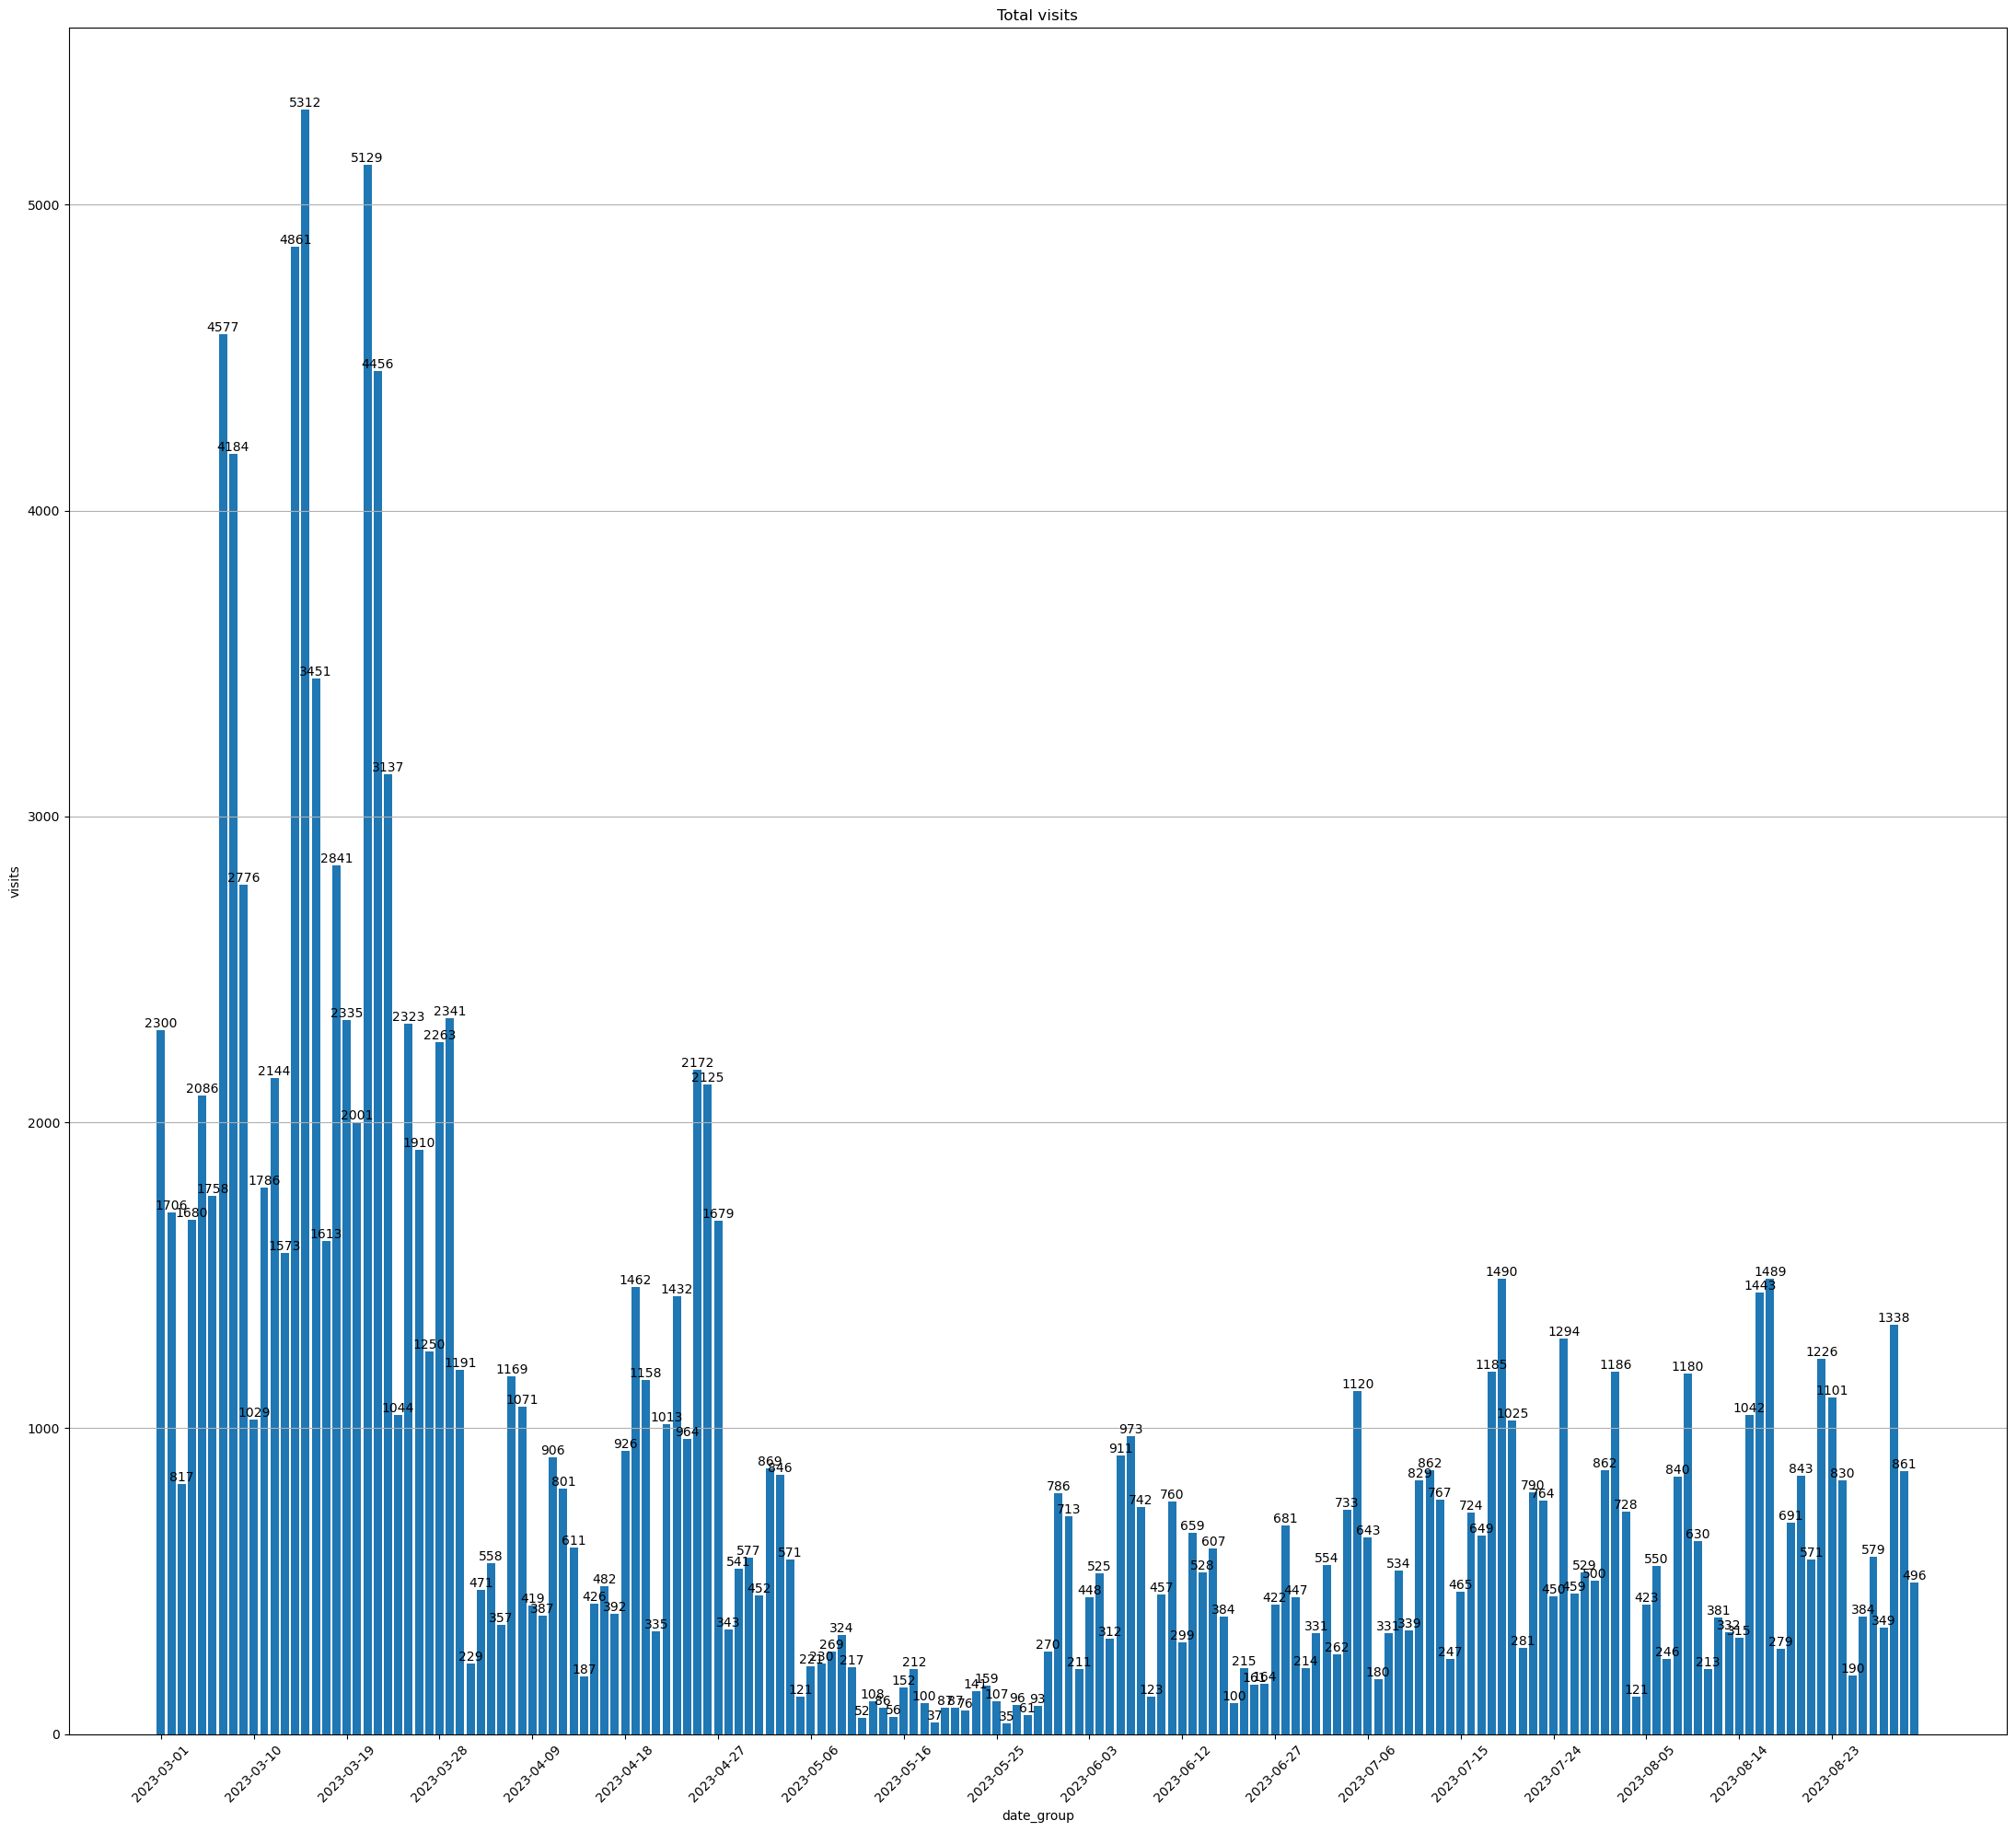

In [33]:
def total_visits_chart(upd_cnv_ads):
    fig, ax = plt.subplots(figsize=(22,20))
    bars = plt.bar(x='date_group', height='visits', data=upd_cnv_ads)
    ax.bar_label(bars)
    plt.title('Total visits')
    plt.xlabel('date_group')
    plt.ylabel('visits')
    plt.xticks(upd_cnv_ads['date_group'][::9], rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Total_visits_chart.png')

total_visits_chart(upd_cnv_ads)

Построим столбчатый график итоговых визитов с разбивкой по платформам (web, android, ios):

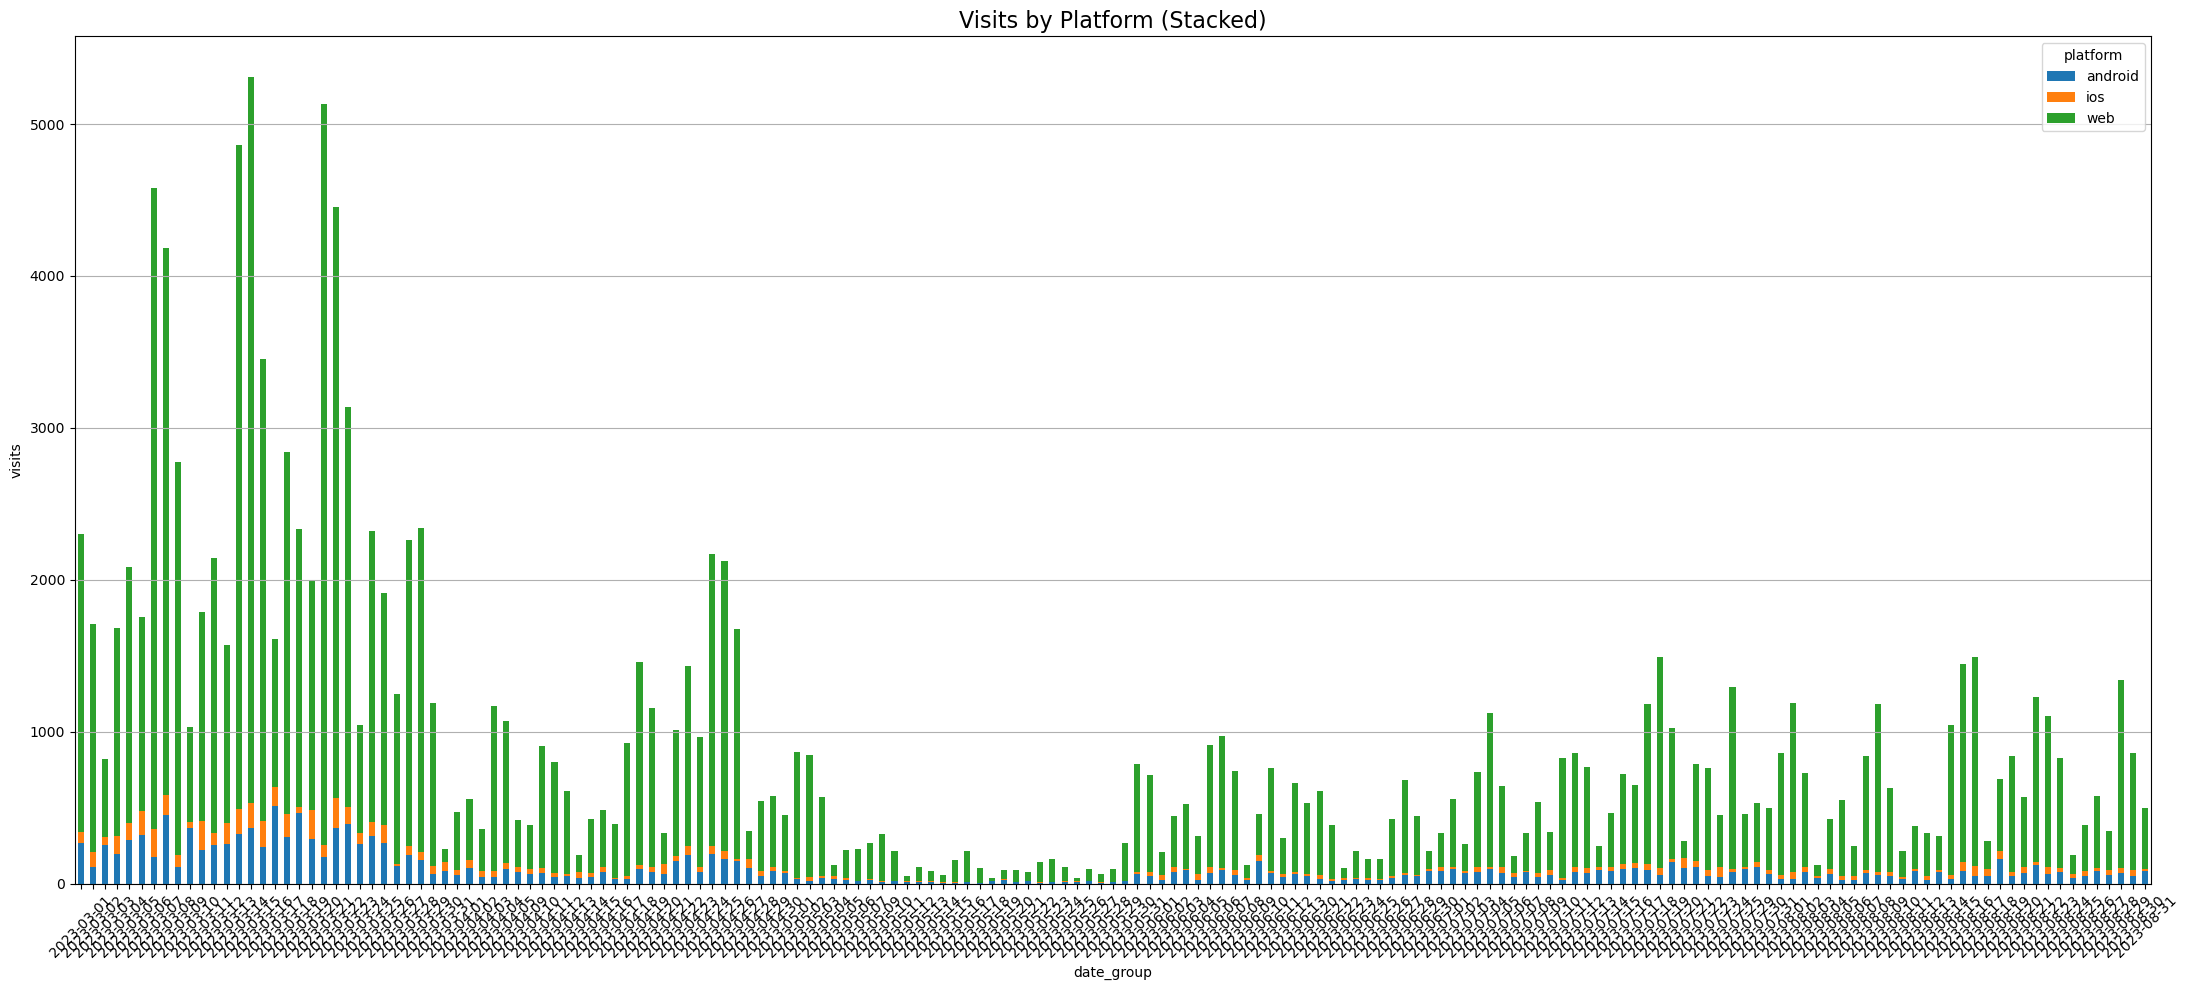

In [34]:
def total_visits_pltfm_chart(cnv_ads):
    fig, ax = plt.subplots(figsize=(22,10))
    cnv_ads_pvt = cnv_ads.pivot_table(index='date_group', columns='platform', values='visits')
    cnv_ads_pvt.plot(kind='bar', stacked=True, ax=ax)
    plt.title('Visits by Platform (Stacked)', fontsize=16)
    plt.xlabel('date_group')
    plt.ylabel('visits')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Total_visits_by_platform_chart.png')

total_visits_pltfm_chart(cnv_ads)

Построим столбчатый график итоговых регистраций за каждый день:

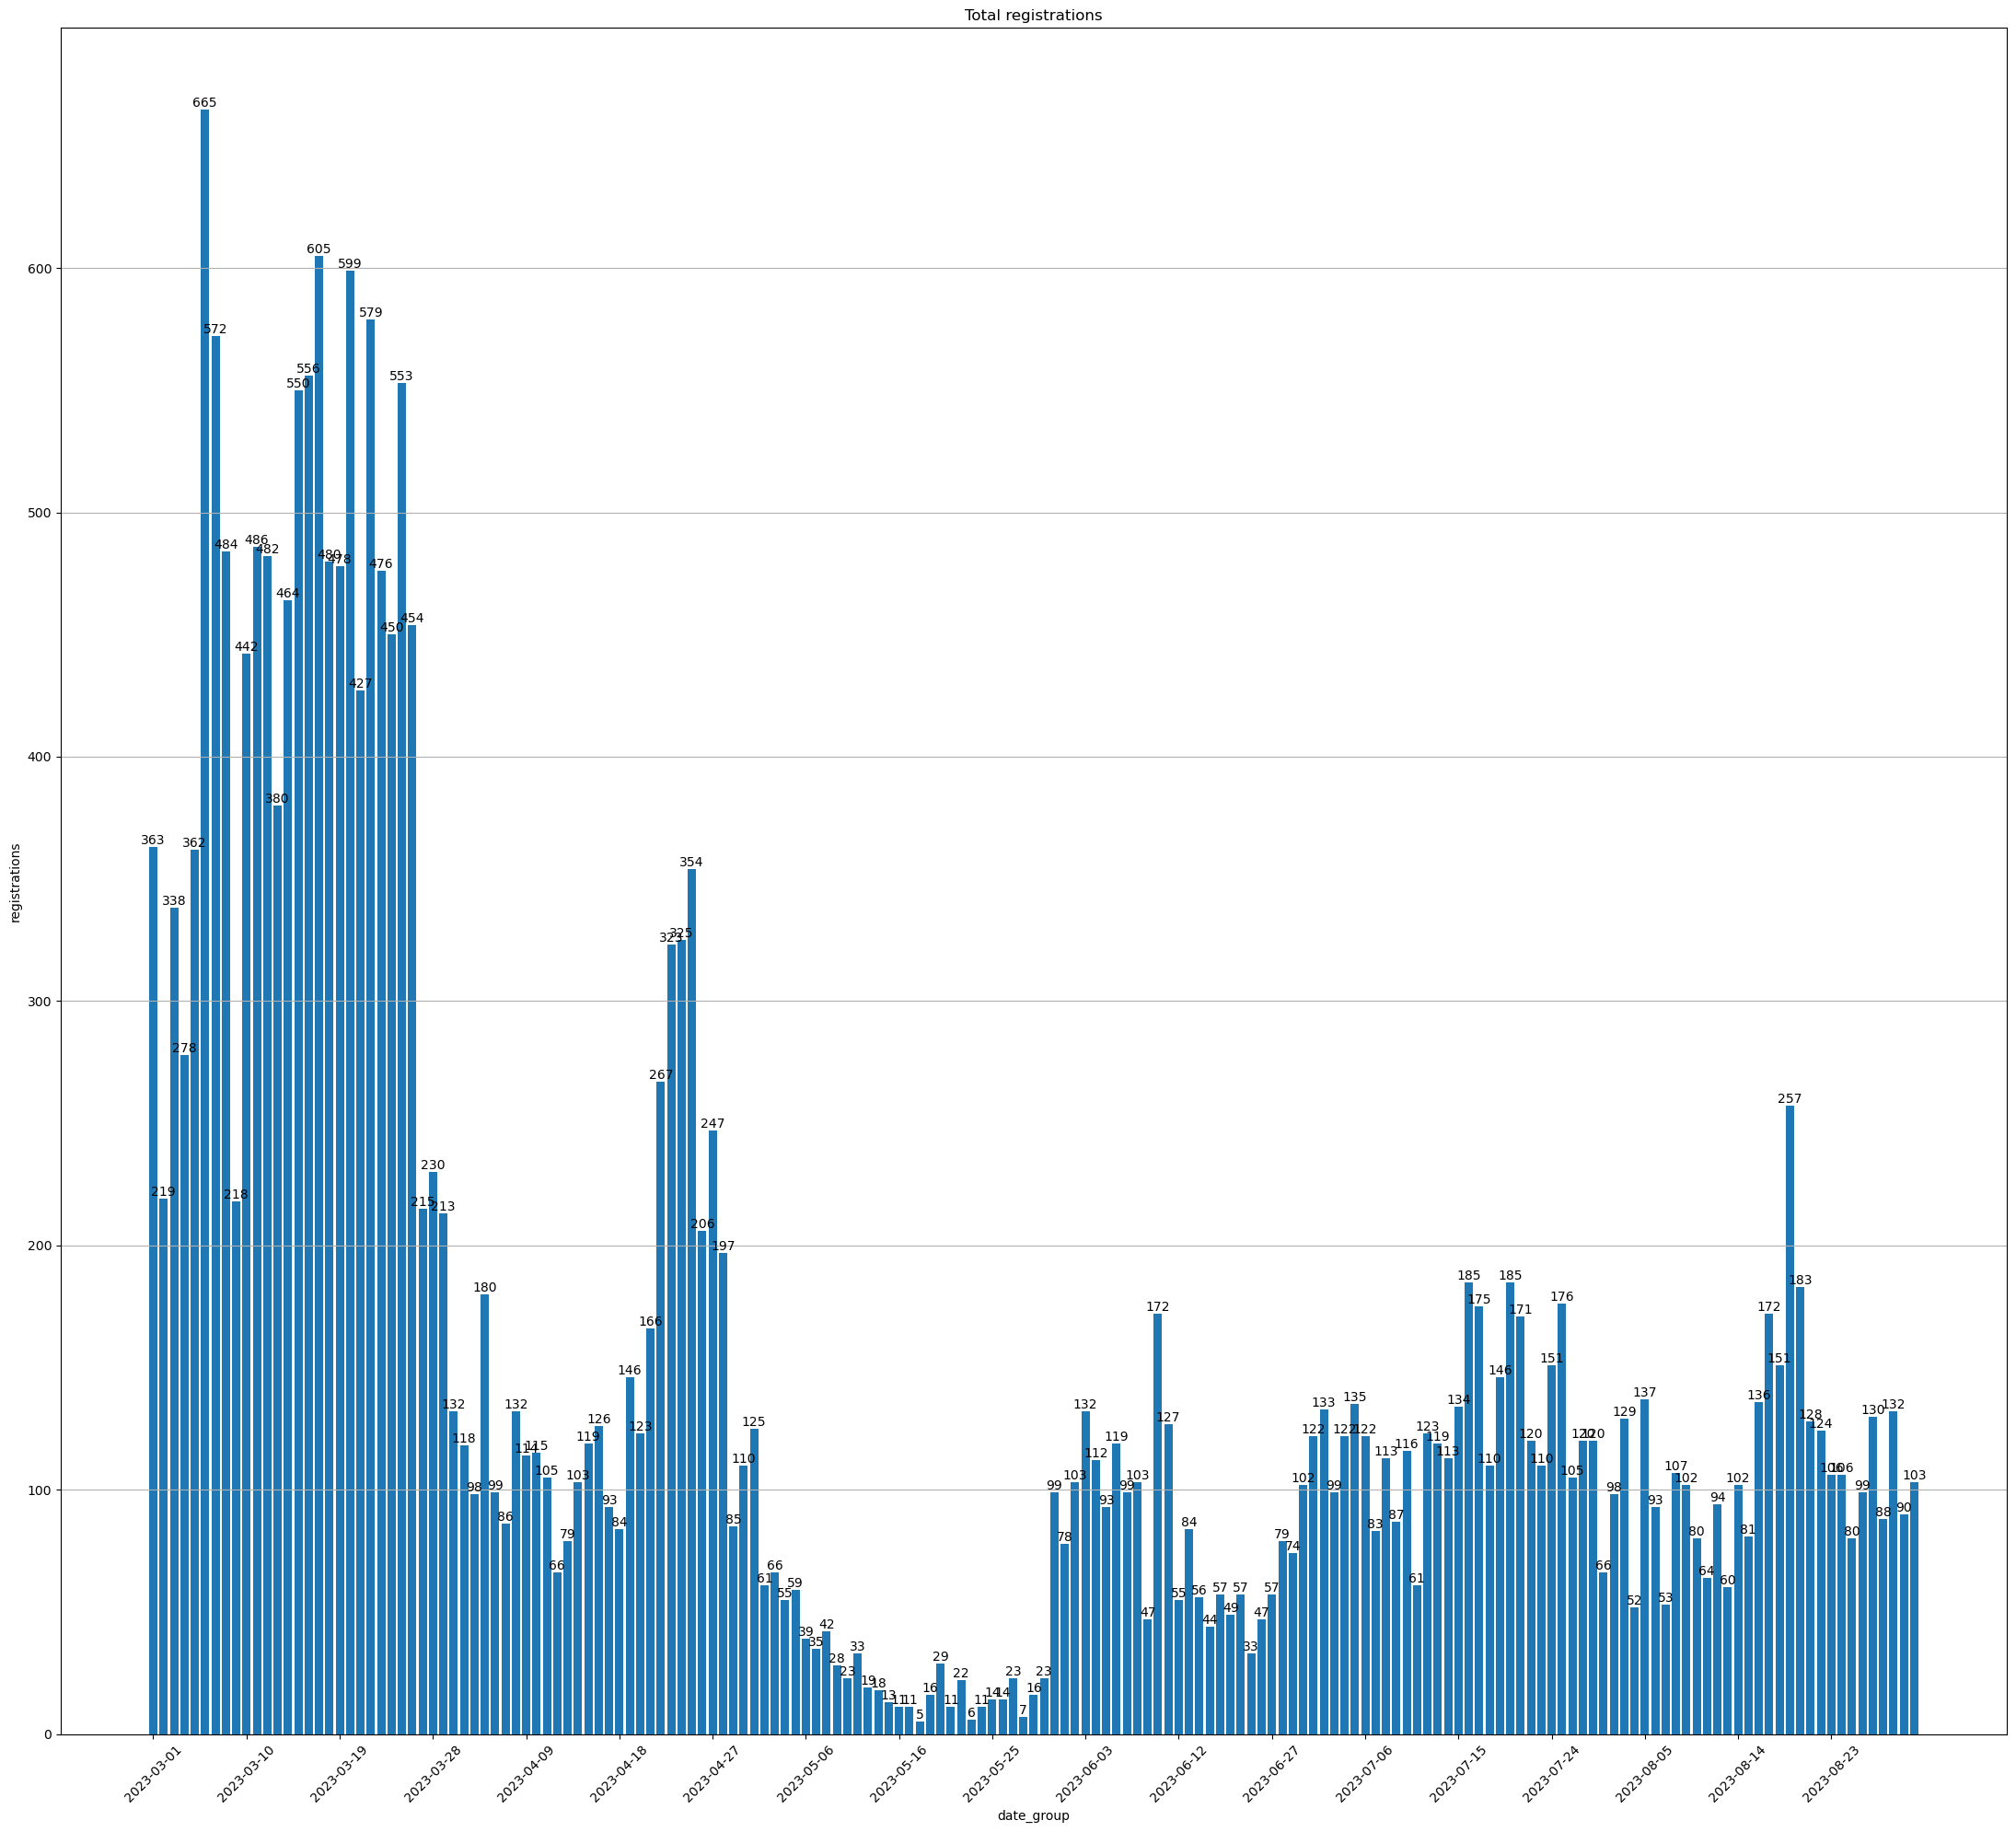

In [35]:
def total_registrations_chart(upd_cnv_ads):
    fig, ax = plt.subplots(figsize=(22,20))
    bars = plt.bar(x='date_group', height='registrations', data=upd_cnv_ads)
    ax.bar_label(bars)
    plt.title('Total registrations')
    plt.xlabel('date_group')
    plt.ylabel('registrations')
    plt.xticks(upd_cnv_ads['date_group'][::9], rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Total_registrations_chart.png')

total_registrations_chart(upd_cnv_ads)

Построим столбчатый график итоговых регистраций с разбивкой по платформам (web, android, ios):

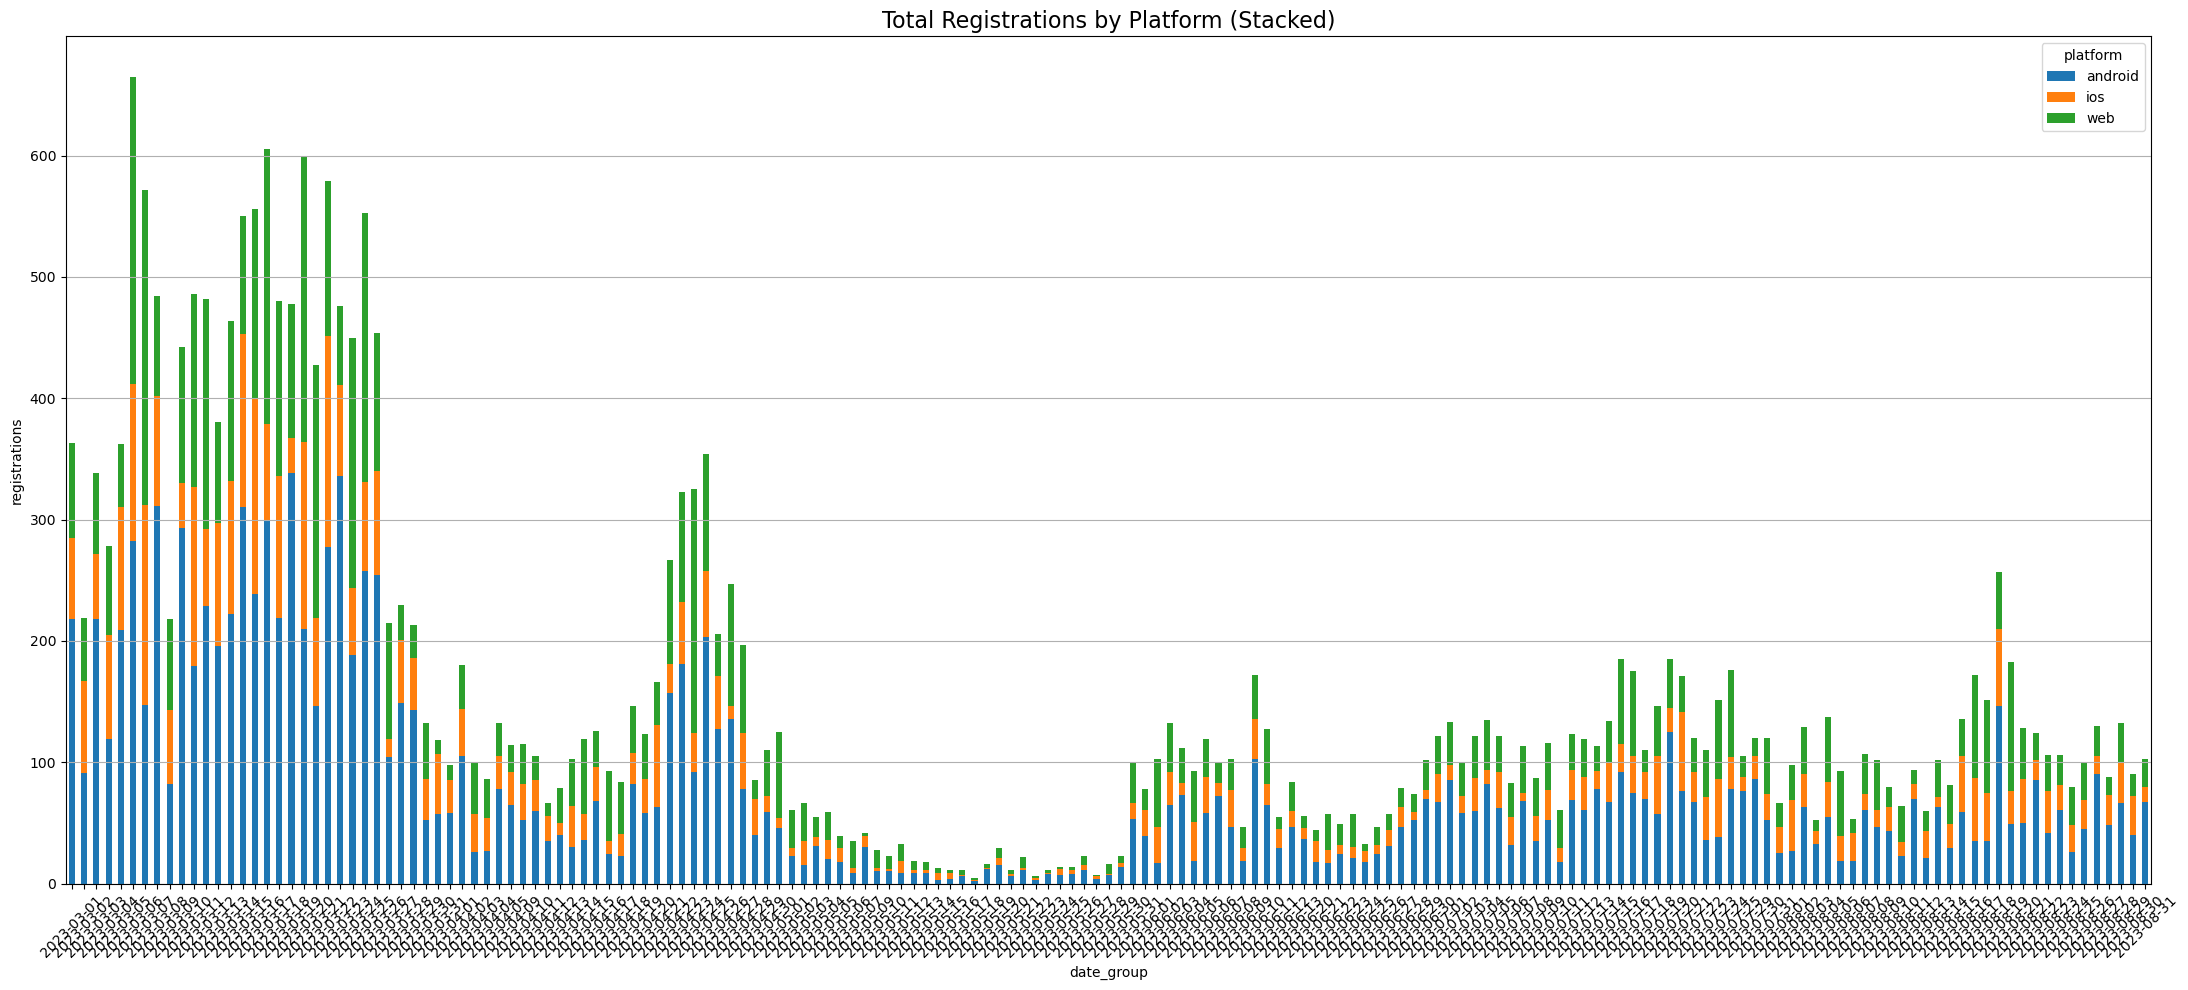

In [36]:
def total_registrations_pltfm_chart(cnv_ads):
    fig, ax = plt.subplots(figsize=(22,10))
    cnv_ads_pvt1 = cnv_ads.pivot_table(index='date_group', columns='platform', values='registrations')
    cnv_ads_pvt1.plot(kind='bar', stacked=True, ax=ax)
    plt.title('Total Registrations by Platform (Stacked)', fontsize=16)
    plt.xlabel('date_group')
    plt.ylabel('registrations')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Total_registrations_by_platform_chart.png')

total_registrations_pltfm_chart(cnv_ads)

Построим столбчатый график итоговых регистраций с разбивкой по типу регистрации (email, google, apple, yandex):

registration_type - тип регистрации: email, google, yandex, apple

In [37]:
registrations # переменная с данными по типам регистрации

,datetime,email,platform,registration_type,user_id
0,2023-03-01,jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,2023-03-01,dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,2023-03-01,kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,2023-03-01,fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,2023-03-01,johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b
...,...,...,...,...,...
28192,2023-08-31,lunazachary@example.com,ios,email,7065467a-39d2-46c7-9041-ed7fbc8d801f
28193,2023-08-31,amyramirez@example.org,ios,apple,93a04829-5ab4-48b5-abf9-8e267150c512
28194,2023-08-31,webermark@example.org,ios,apple,6ff0e3b5-af42-42ba-ae6e-395051d79360
28195,2023-08-31,alexandermichael@example.com,ios,email,6d8b00e7-4696-43b1-8d79-91f2b7bef9cd


In [38]:
def upd_registr(registrations):
    # приведение значений в столбце "datetime" к смешанному формату:
    registrations['datetime'] = pd.to_datetime(registrations['datetime'], format='mixed')
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    registrations['datetime'] = registrations['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    upd_regs = registrations.sort_values('datetime').groupby(['datetime', 'registration_type']).agg({'user_id': 'count'}).reset_index()
    upd_regs = upd_regs.rename(columns={'datetime': 'date_group', 'user_id': 'registrations'})
    return upd_regs

In [39]:
upd_regs1 = upd_registr(registrations)
upd_regs1.head(500000)

,date_group,registration_type,registrations
0,2023-03-01,apple,48
1,2023-03-01,email,169
2,2023-03-01,google,124
3,2023-03-01,yandex,22
4,2023-03-02,apple,50
...,...,...,...
716,2023-08-30,yandex,5
717,2023-08-31,apple,10
718,2023-08-31,email,61
719,2023-08-31,google,28


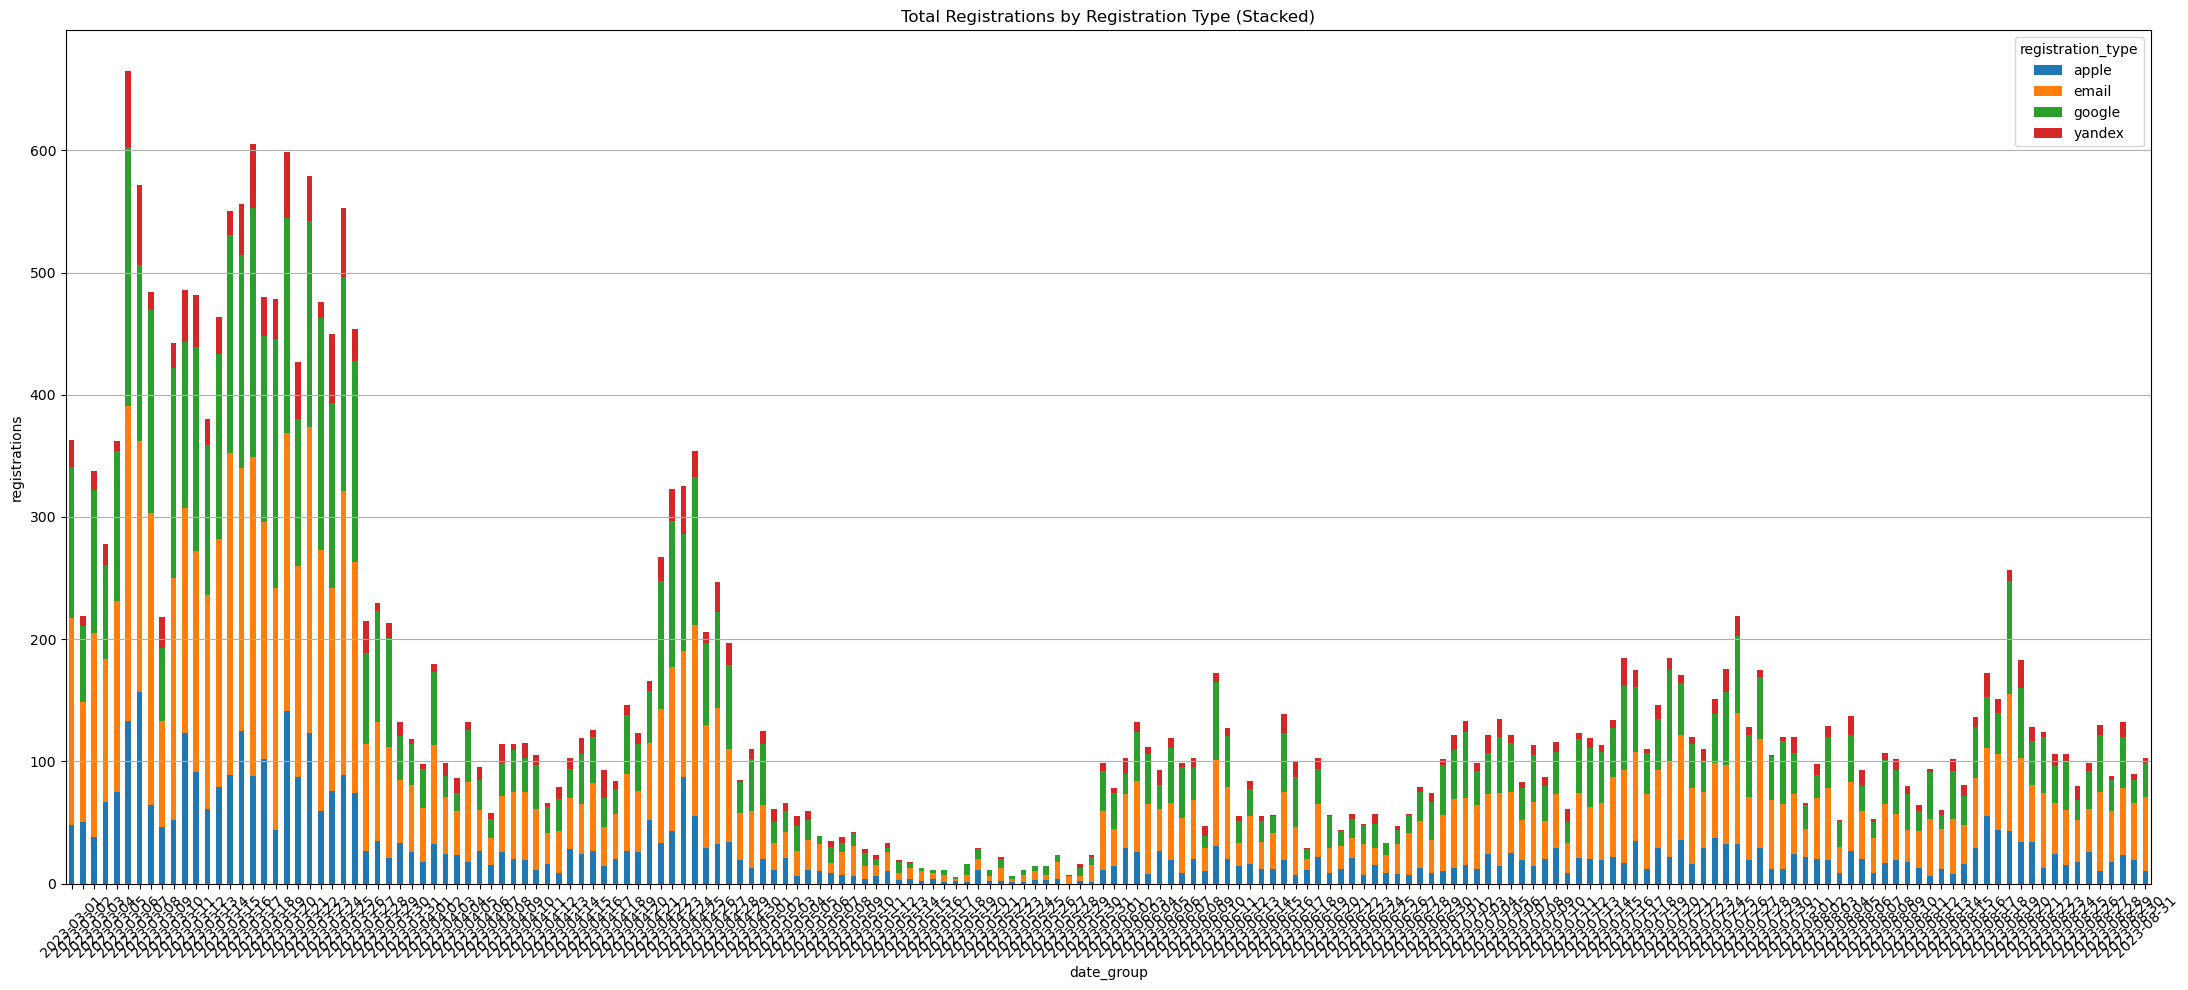

In [40]:
def total_registr_type_chart(upd_regs1):
    fig, ax = plt.subplots(figsize=(22,10))
    upd_regs1_pvt = upd_regs1.pivot_table(index='date_group', columns='registration_type', values='registrations')
    upd_regs1_pvt.plot(kind='bar', stacked=True, ax=ax)
    plt.title('Total Registrations by Registration Type (Stacked)')
    plt.xlabel('date_group')
    plt.ylabel('registrations')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Total_registr_by_type_chart.png')

total_registr_type_chart(upd_regs1)

Построим графики итоговых регистраций с разбивкой по платформе и типу регистрации (pie chart):

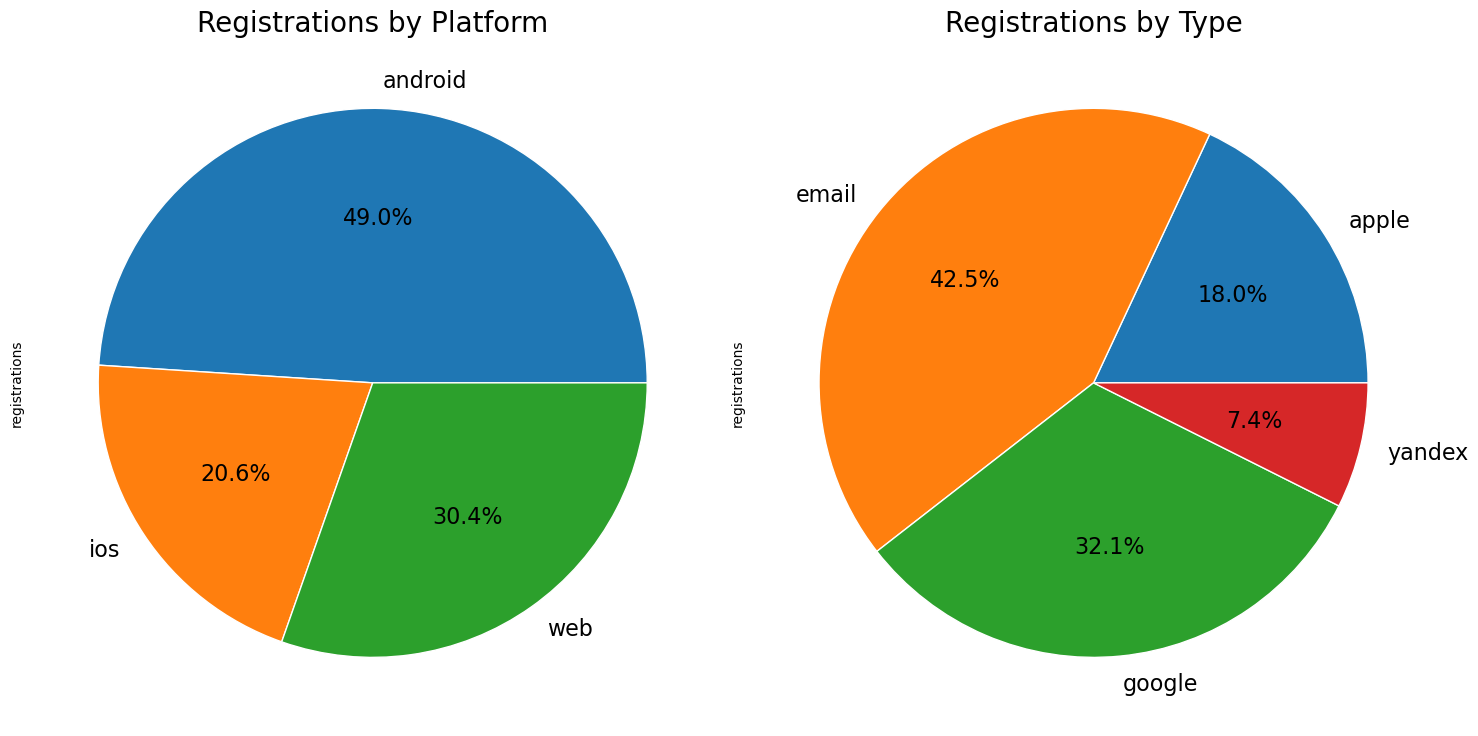

In [41]:
# для двух круговых диаграмм, расположенных в одну строку
def total_registr_pltfm_types_piechart(cnv_ads, upd_regs1):
    fig, axes = plt.subplots(1, 2, figsize=(15,10))
    cnv_ads.groupby(['platform']).sum().plot(ax=axes[0], kind='pie', y='registrations', autopct='%1.1f%%', fontsize=16, wedgeprops={"linewidth": 1, "edgecolor": "white"}, legend=False)
    upd_regs1.groupby(['registration_type']).sum().plot(ax=axes[1], kind='pie', y='registrations', autopct='%1.1f%%', fontsize=16, wedgeprops={"linewidth": 1, "edgecolor": "white"}, legend=False)
    axes[0].set_title('Registrations by Platform', fontsize=20)
    axes[1].set_title('Registrations by Type', fontsize=20)
    plt.tight_layout()
    plt.savefig('./charts/Total_registr_by_platform_piechart.png')

total_registr_pltfm_types_piechart(cnv_ads, upd_regs1)

Построим график итоговой конверсии:

In [42]:
# получим датафрейм с итоговой конверсией:
def overall_cnv(upd_cnv_ads):
    upd_cnv_ads['overall_conversion'] = (upd_cnv_ads['registrations'] / upd_cnv_ads['visits'] * 100).round(1)
    return upd_cnv_ads

In [43]:
overall_cnv = overall_cnv(upd_cnv_ads)
overall_cnv.head(200)

,date_group,visits,registrations,cost,utm_campaign,overall_conversion
0,2023-03-01,2300,363,714,virtual_reality_workshop,15.8
1,2023-03-02,1706,219,492,virtual_reality_workshop,12.8
2,2023-03-03,817,338,720,virtual_reality_workshop,41.4
3,2023-03-04,1680,278,501,virtual_reality_workshop,16.5
4,2023-03-05,2086,362,804,virtual_reality_workshop,17.4
...,...,...,...,...,...,...
166,2023-08-27,579,130,870,cybersecurity_special,22.5
167,2023-08-28,349,88,750,cybersecurity_special,25.2
168,2023-08-29,1338,132,405,cybersecurity_special,9.9
169,2023-08-30,861,90,390,cybersecurity_special,10.5


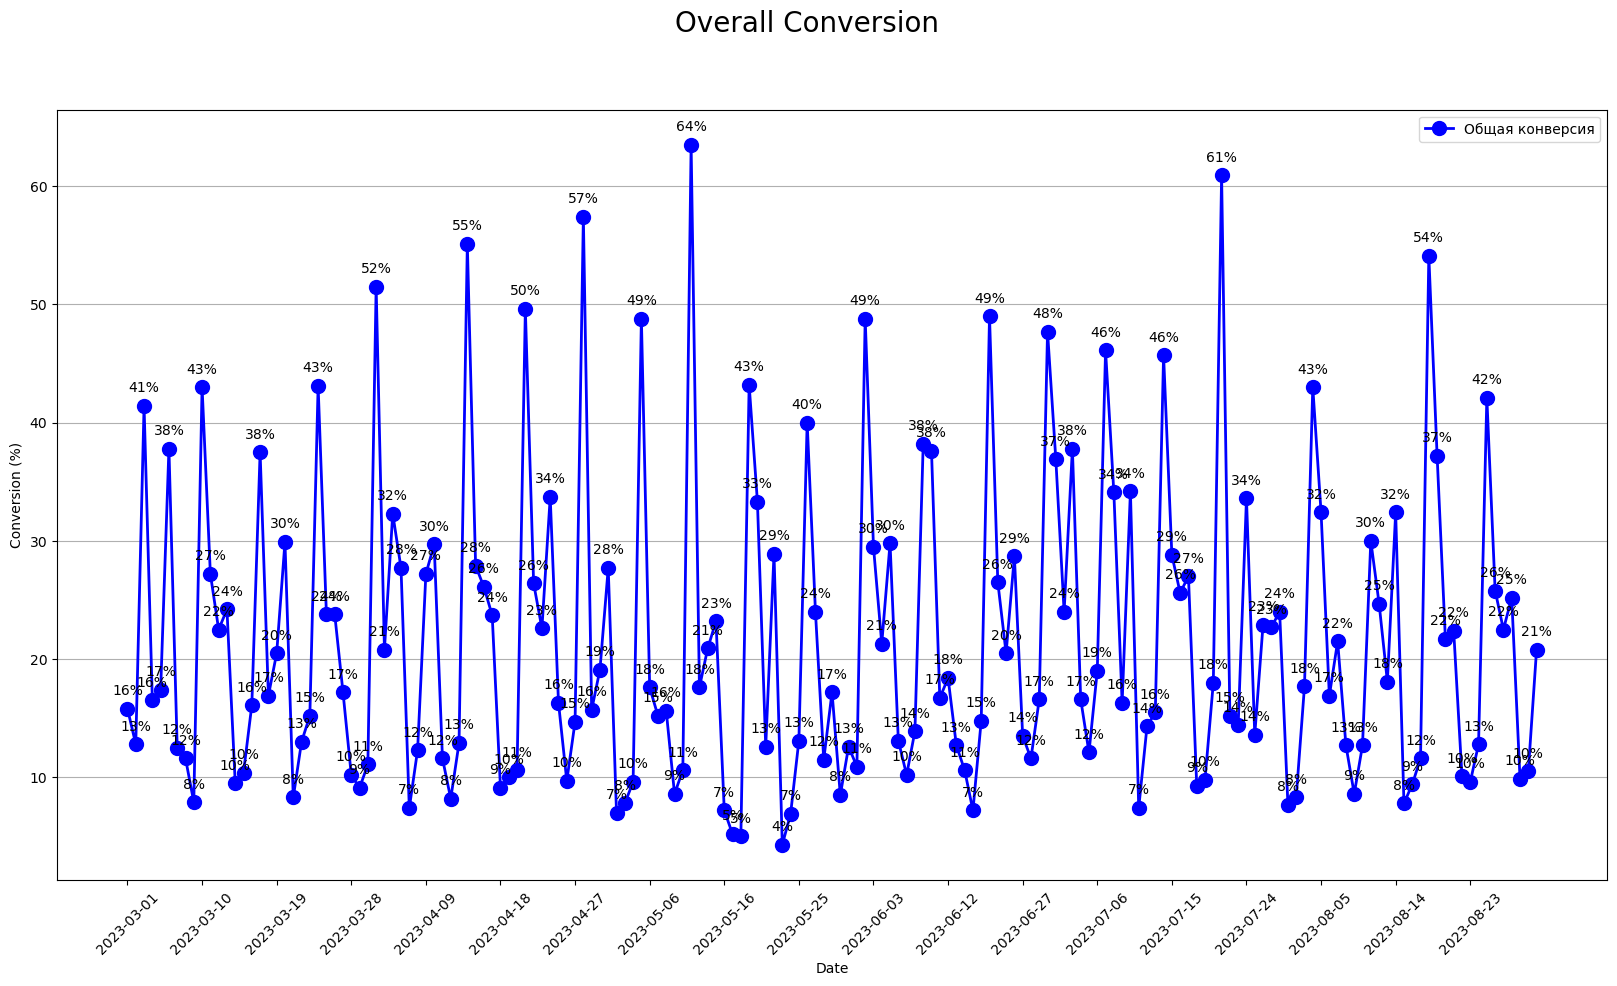

In [44]:
def overall_conversion_chart(overall_cnv):
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)
    fig.suptitle('Overall Conversion', fontsize=20)
    x = overall_cnv['date_group']
    y = overall_cnv['overall_conversion']
    ax.plot(x, y,
            marker="o",
            c="b",
            label='Общая конверсия',
            linewidth=2,
            markersize=10)
    for x,y in zip(x,y):
        label = "{:.0f}%".format(y)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Conversion (%)')
    ax.grid(axis='y')
    plt.xticks(overall_cnv['date_group'][::9], rotation=45)
    plt.savefig('./charts/Overall_conversion_chart.png')

overall_conversion_chart(overall_cnv)

Построим график средней конверсии:

In [45]:
cnv_ads # переменная с данными по конверсии

,date_group,platform,visits,registrations,conversion,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,android,264,218,82.58,google,cpc,virtual_reality_workshop,238
1,2023-03-01,ios,78,67,85.90,google,cpc,virtual_reality_workshop,238
2,2023-03-01,web,1958,78,3.98,google,cpc,virtual_reality_workshop,238
3,2023-03-02,android,106,91,85.85,google,cpc,virtual_reality_workshop,164
4,2023-03-02,ios,103,76,73.79,google,cpc,virtual_reality_workshop,164
...,...,...,...,...,...,...,...,...,...
508,2023-08-30,ios,40,32,80.00,yandex,cpc,cybersecurity_special,130
509,2023-08-30,web,774,18,2.33,yandex,cpc,cybersecurity_special,130
510,2023-08-31,android,80,67,83.75,yandex,cpc,cybersecurity_special,192
511,2023-08-31,ios,16,13,81.25,yandex,cpc,cybersecurity_special,192


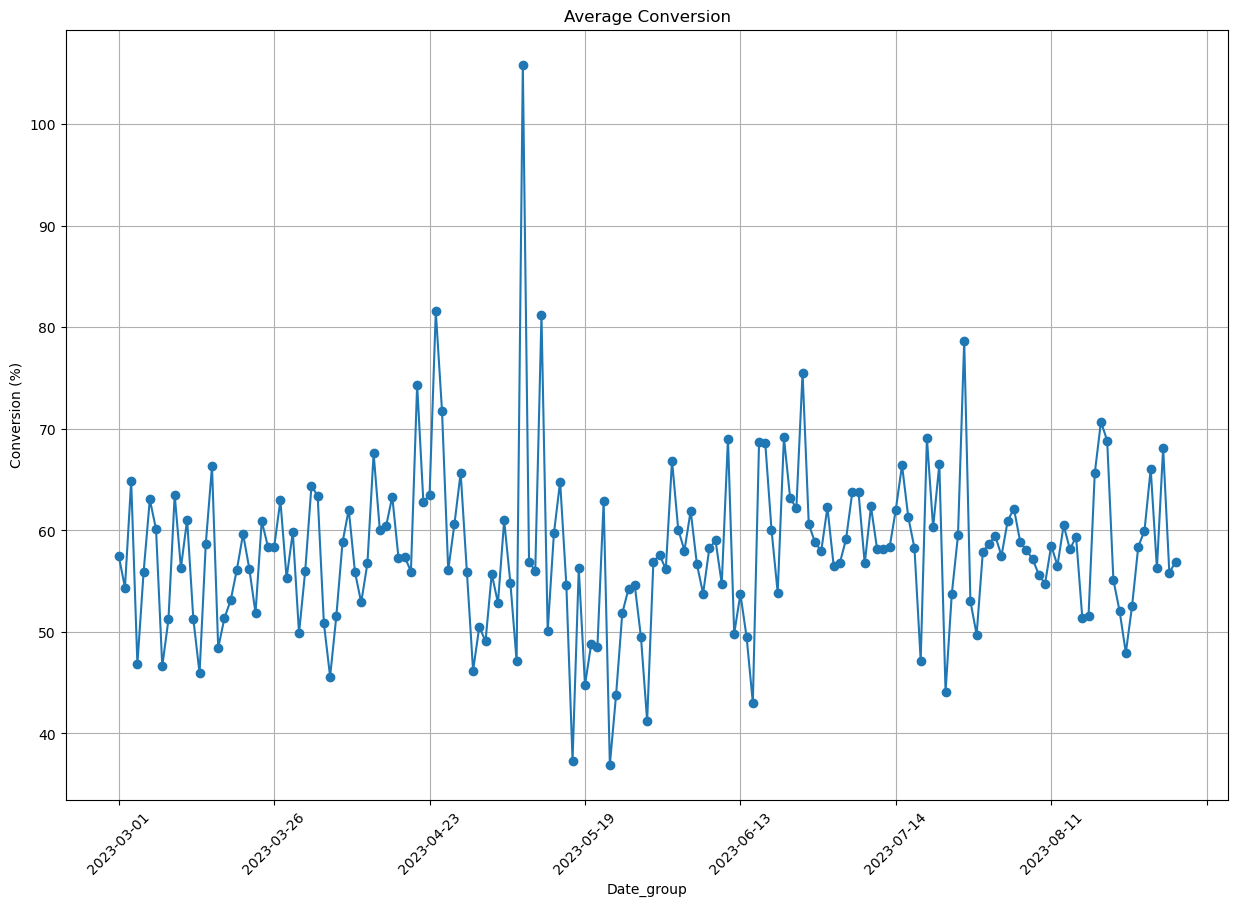

In [46]:
def avg_conversion_chart(cnv_ads):
    avg_conv_chart = cnv_ads.groupby('date_group')['conversion'].mean().plot(figsize=(15,10), style='o-', grid=True)
    plt.title('Average Conversion')
    plt.xlabel('Date_group')
    plt.ylabel('Conversion (%)')
    plt.xticks(rotation=45)
    plt.savefig('./charts/Avg_conversion.png')

avg_conversion_chart(cnv_ads)

Построим график стоимости реклам:

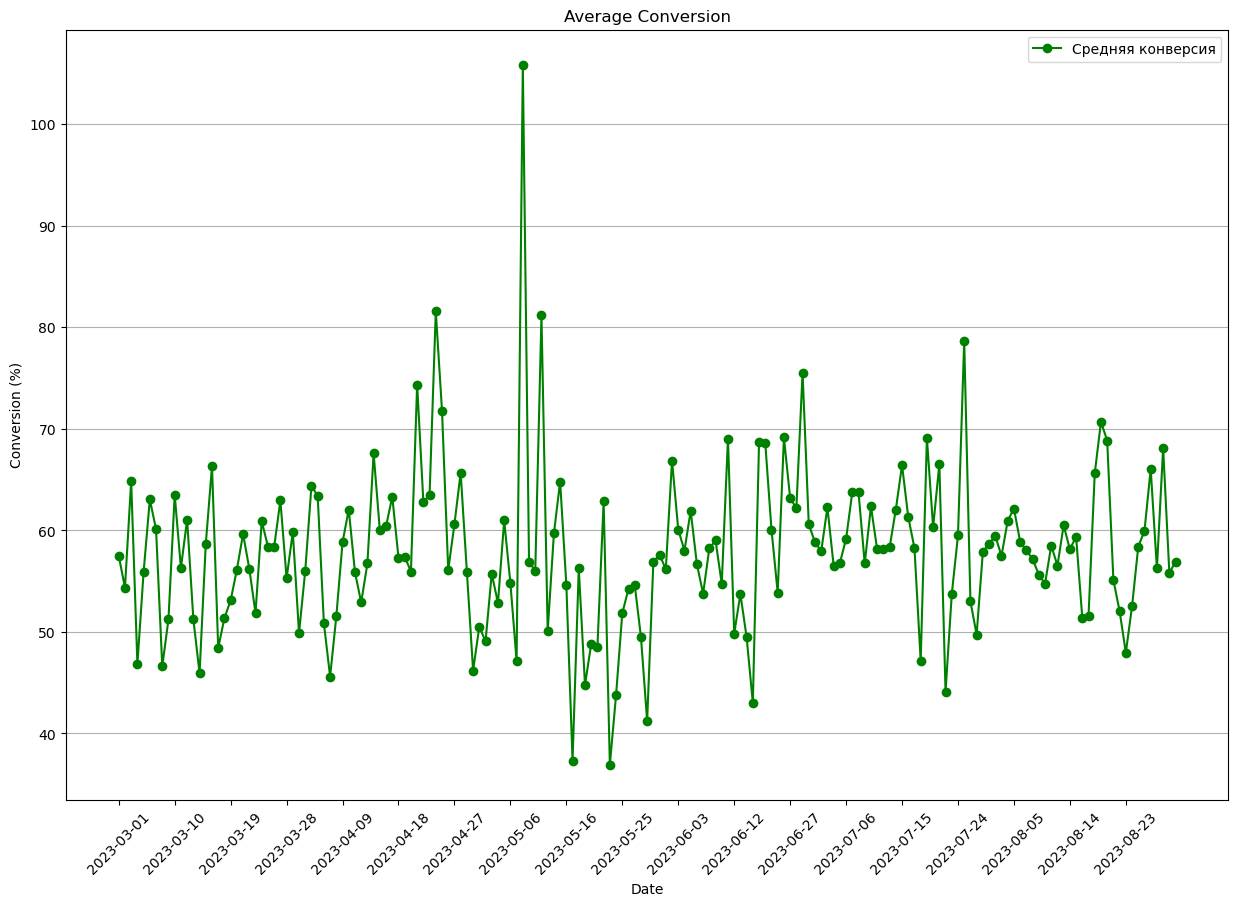

In [47]:
# график средней конверсии с правильным выводом для команды poetry run main
def avg_conversion_chart(cnv_ads):
    avg_conversion = cnv_ads.groupby('date_group')['conversion'].mean().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    x = avg_conversion['date_group']
    y = avg_conversion['conversion']
    ax.plot(x, y,
            marker="o",
            c="g",
            label='Средняя конверсия',
            linewidth=1.5,
            markersize=6)
    '''for x,y in zip(x,y):
        label = "{:.0f}%".format(y)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')'''
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Conversion (%)')
    ax.grid(axis='y')
    plt.title('Average Conversion')
    plt.xticks(avg_conversion['date_group'][::9], rotation=45)
    plt.savefig('./charts/Avg_conversion_chart.png')

avg_conversion_chart(cnv_ads)

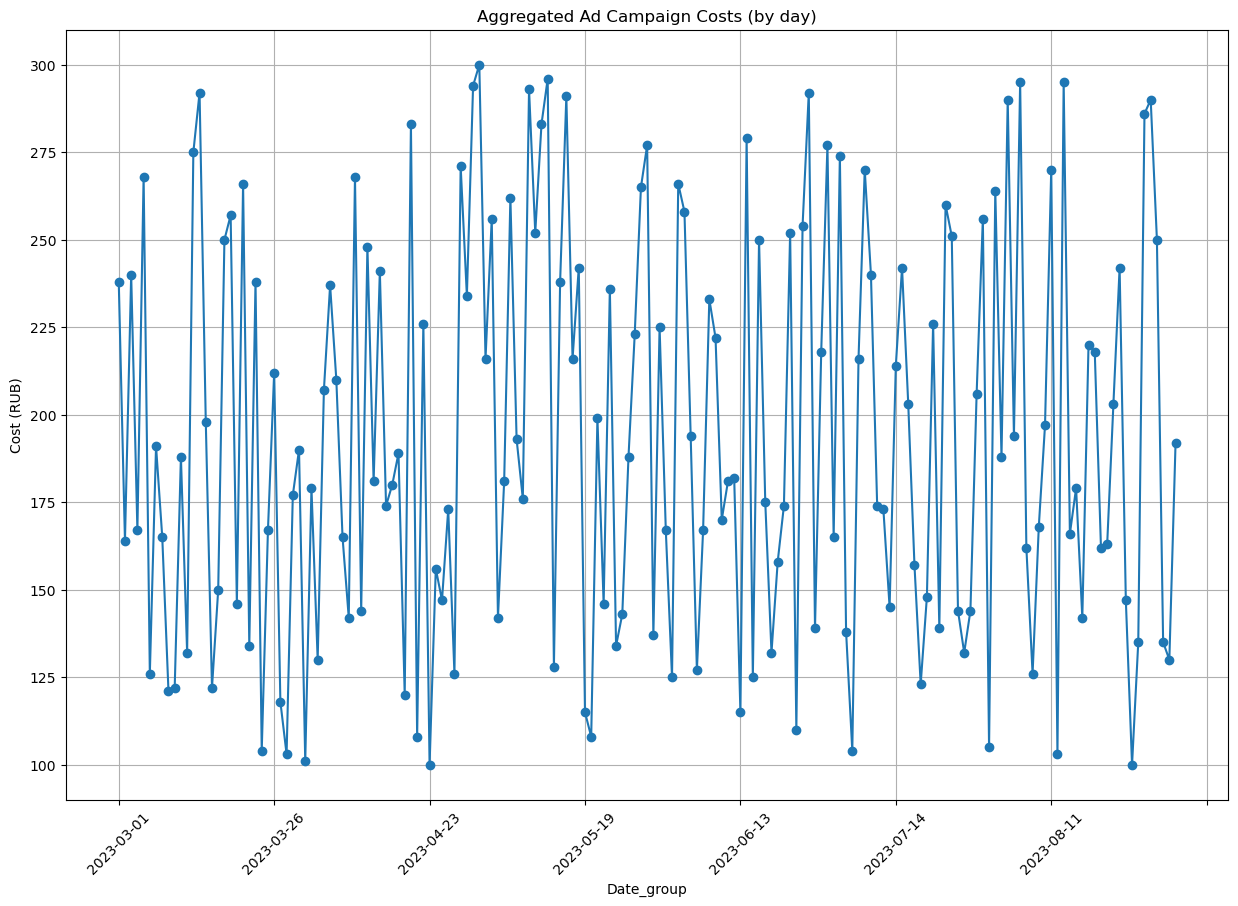

In [48]:
def adcosts_chart(cnv_ads):
    adcosts_chrt = cnv_ads.groupby('date_group')['cost'].mean().plot(figsize=(15,10), style='o-', grid=True)
    plt.title('Aggregated Ad Campaign Costs (by day)')
    plt.xlabel('Date_group')
    plt.ylabel('Cost (RUB)')
    plt.xticks(rotation=45)
    plt.savefig('./charts/Adcosts_chart.png')

adcosts_chart(cnv_ads)

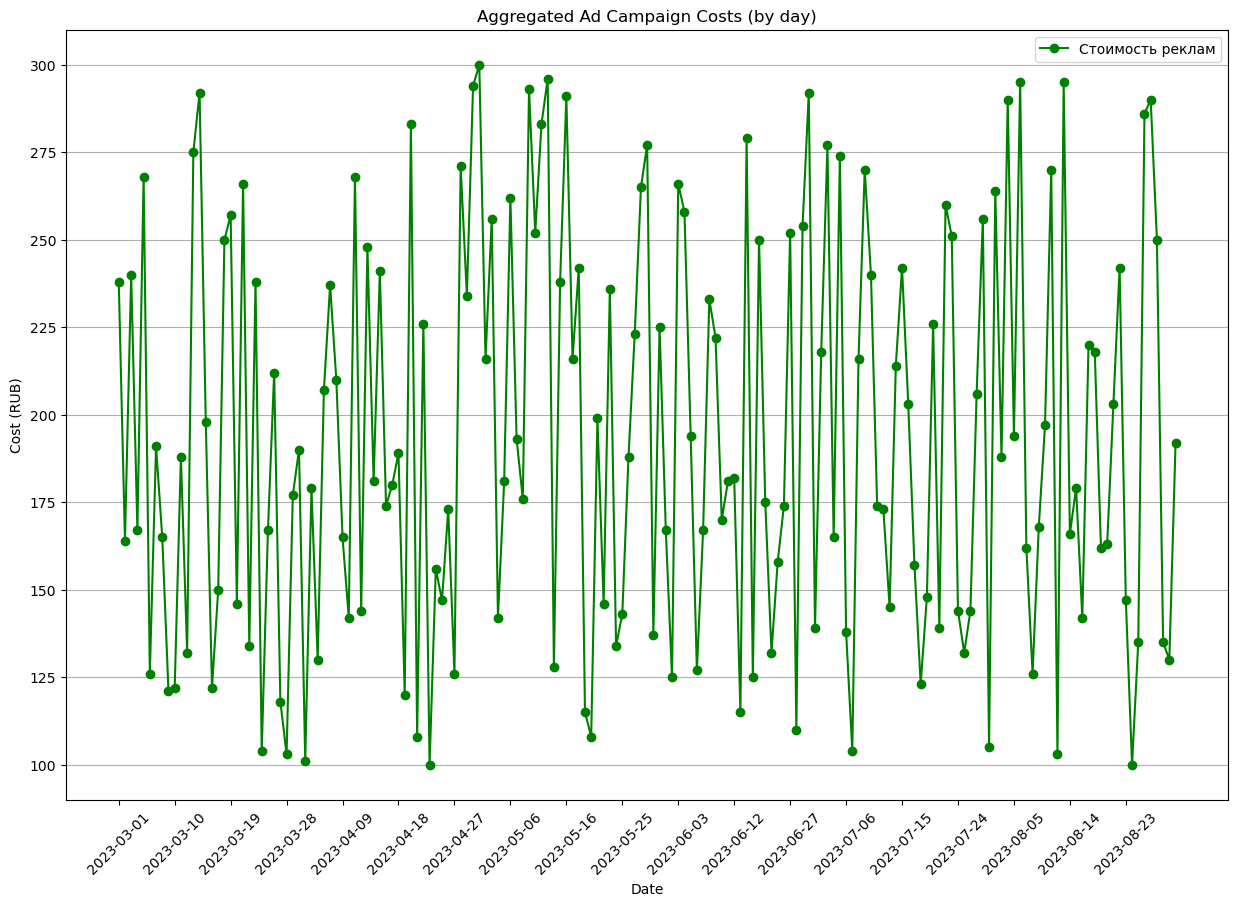

In [49]:
# график стоимости реклам с правильным выводом для команды poetry run main 
def adcosts_chart(cnv_ads):
    adcosts = cnv_ads.groupby('date_group')['cost'].mean().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    x = adcosts['date_group']
    y = adcosts['cost']
    ax.plot(x, y,
            marker="o",
            c="g",
            label='Стоимость реклам',
            linewidth=1.5,
            markersize=6)
    '''for x,y in zip(x,y):
        label = "{:.0f} RUB".format(y)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')'''
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Cost (RUB)')
    ax.grid(axis='y')
    plt.title('Aggregated Ad Campaign Costs (by day)')
    plt.xticks(adcosts['date_group'][::9], rotation=45)
    plt.savefig('./charts/Adcosts_chart.png')
adcosts_chart(cnv_ads)

Построим графики конверсии по каждой платформе:

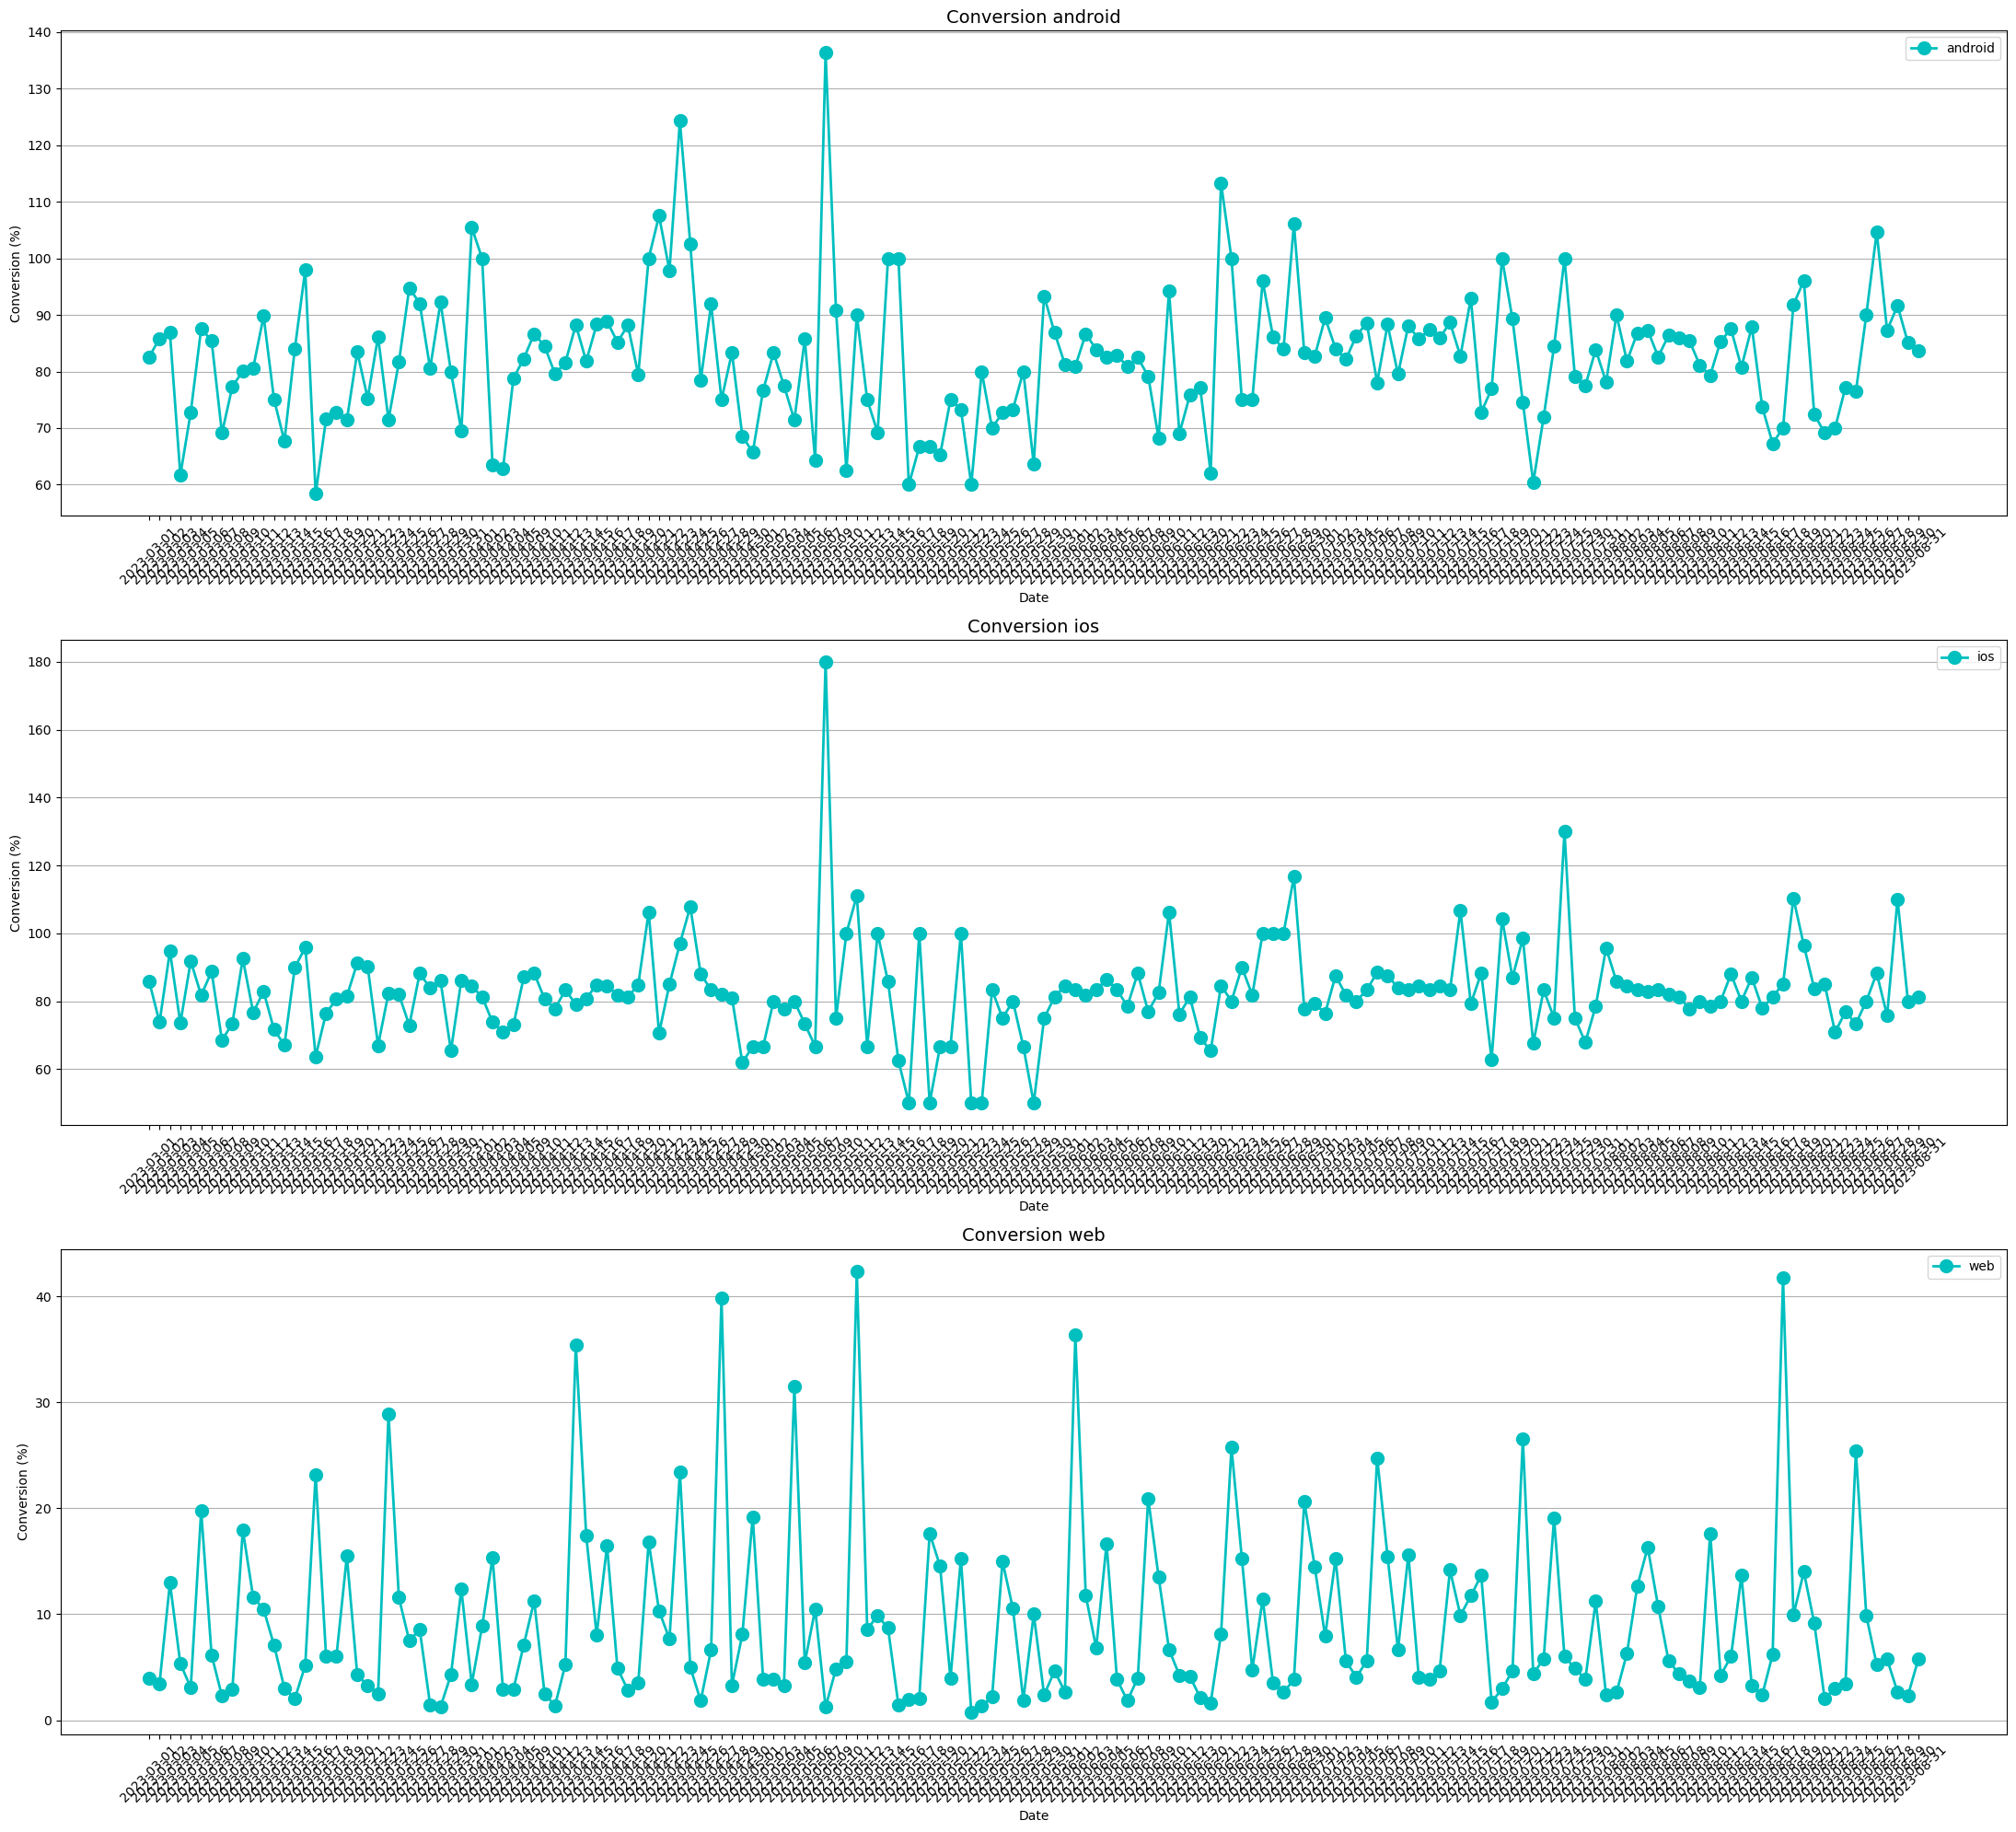

In [50]:
def conversion_pltfm_chart(cnv_ads):
    cnv_ads_pvt = cnv_ads.pivot_table(index='date_group', columns='platform', values='conversion')
    cnv_ads_pvt.reset_index(inplace=True)
    fig, axes = plt.subplots(3, 1, figsize=(22,20))
    
    x = cnv_ads_pvt['date_group']
    y = cnv_ads_pvt['android']
    axes[0].plot(x, y,
            marker="o",
            c="c",
            label='android',
            linewidth=2,
            markersize=10)
    axes[0].legend()
    axes[0].set_title('Conversion android', fontsize=14)
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Conversion (%)')
    axes[0].set_xticks(cnv_ads_pvt['date_group'])
    axes[0].set_xticklabels(cnv_ads_pvt['date_group'], rotation=45)
    axes[0].grid(axis='y')
    
    x1 = cnv_ads_pvt['date_group']
    y1 = cnv_ads_pvt['ios']
    axes[1].plot(x1, y1,
            marker="o",
            c="c",
            label='ios',
            linewidth=2,
            markersize=10)
    axes[1].legend()
    axes[1].set_title('Conversion ios', fontsize=14)
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Conversion (%)')
    axes[1].set_xticks(cnv_ads_pvt['date_group'])
    axes[1].set_xticklabels(cnv_ads_pvt['date_group'], rotation=45)
    axes[1].grid(axis='y')

    x2 = cnv_ads_pvt['date_group']
    y2 = cnv_ads_pvt['web']
    axes[2].plot(x2, y2,
            marker="o",
            c="c",
            label='web',
            linewidth=2,
            markersize=10)
    axes[2].legend()
    axes[2].set_title('Conversion web', fontsize=14)
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Conversion (%)')
    axes[2].set_xticks(cnv_ads_pvt['date_group'])
    axes[2].set_xticklabels(cnv_ads_pvt['date_group'], rotation=45)
    axes[2].grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Conversion_by_platform_chart.png')

conversion_pltfm_chart(cnv_ads)

Построим графики визитов и регистраций с выделением рекламных кампаний:

In [51]:
# количество рекламных кампаний по видам
'''utm_campaigns = cnv_ads['utm_campaign'].value_counts()
utm_campaigns.head(10)'''

"utm_campaigns = cnv_ads['utm_campaign'].value_counts()\nutm_campaigns.head(10)"

In [52]:
'''campaign_days = cnv_ads[['date_group', 'utm_campaign']]'''

"campaign_days = cnv_ads[['date_group', 'utm_campaign']]"

In [53]:
'''virtual_reality_workshop = campaign_days.loc[campaign_days['utm_campaign'] == 'virtual_reality_workshop']
start_date = virtual_reality_workshop['date_group'].min()
end_date = virtual_reality_workshop['date_group'].max()
print(start_date, end_date)'''

"virtual_reality_workshop = campaign_days.loc[campaign_days['utm_campaign'] == 'virtual_reality_workshop']\nstart_date = virtual_reality_workshop['date_group'].min()\nend_date = virtual_reality_workshop['date_group'].max()\nprint(start_date, end_date)"

In [54]:
'''game_dev_crash_course = campaign_days.loc[campaign_days['utm_campaign'] == 'game_dev_crash_course']
start_date = game_dev_crash_course['date_group'].min()
end_date = game_dev_crash_course['date_group'].max()
print(start_date, end_date)'''

"game_dev_crash_course = campaign_days.loc[campaign_days['utm_campaign'] == 'game_dev_crash_course']\nstart_date = game_dev_crash_course['date_group'].min()\nend_date = game_dev_crash_course['date_group'].max()\nprint(start_date, end_date)"

In [55]:
'''web_dev_workshop_series = campaign_days.loc[campaign_days['utm_campaign'] == 'web_dev_workshop_series']
start_date = web_dev_workshop_series['date_group'].min()
end_date = web_dev_workshop_series['date_group'].max()
print(start_date, end_date)'''

"web_dev_workshop_series = campaign_days.loc[campaign_days['utm_campaign'] == 'web_dev_workshop_series']\nstart_date = web_dev_workshop_series['date_group'].min()\nend_date = web_dev_workshop_series['date_group'].max()\nprint(start_date, end_date)"

In [56]:
'''tech_career_fair = campaign_days.loc[campaign_days['utm_campaign'] == 'tech_career_fair']
start_date = tech_career_fair['date_group'].min()
end_date = tech_career_fair['date_group'].max()
print(start_date, end_date)'''

"tech_career_fair = campaign_days.loc[campaign_days['utm_campaign'] == 'tech_career_fair']\nstart_date = tech_career_fair['date_group'].min()\nend_date = tech_career_fair['date_group'].max()\nprint(start_date, end_date)"

In [57]:
'''cybersecurity_special = campaign_days.loc[campaign_days['utm_campaign'] == 'cybersecurity_special']
start_date = cybersecurity_special['date_group'].min()
end_date = cybersecurity_special['date_group'].max()
print(start_date, end_date)'''

"cybersecurity_special = campaign_days.loc[campaign_days['utm_campaign'] == 'cybersecurity_special']\nstart_date = cybersecurity_special['date_group'].min()\nend_date = cybersecurity_special['date_group'].max()\nprint(start_date, end_date)"

In [ ]:
# создаем датафрейм с периодами проведения рекламных кампаний:
'''periods_of_ads = pd.DataFrame(columns=['start_date', 'end_date', 'utm_campaign'])
periods_of_ads['start_date'] = [virtual_reality_workshop['date_group'].min(), game_dev_crash_course['date_group'].min(), web_dev_workshop_series['date_group'].min(), tech_career_fair['date_group'].min(), cybersecurity_special['date_group'].min()]
periods_of_ads['end_date'] = [virtual_reality_workshop['date_group'].max(), game_dev_crash_course['date_group'].max(), web_dev_workshop_series['date_group'].max(), tech_career_fair['date_group'].max(), cybersecurity_special['date_group'].max()]
periods_of_ads['utm_campaign'] = ['virtual_reality_workshop', 'game_dev_crash_course', 'web_dev_workshop_series', 'tech_career_fair', 'cybersecurity_special']
periods_of_ads.head(10)'''

In [ ]:
# # для цветового выделения рекламных кампаний (1)
'''ads_started = periods_of_ads['start_date'].to_list()
ads_ended = periods_of_ads['end_date'].to_list()
for i in range(len(ads_started)):
    ax.axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])'''

In [ ]:
# для цветового выделения рекламных кампаний (2) НЕ СМОТРЕТЬ
'''visits_by_campaign = cnv_ads.pivot_table(index='date_group', columns='utm_campaign', values='visits').reset_index()
visits_by_campaign = visits_by_campaign.fillna({'cybersecurity_special':0, 'game_dev_crash_course':0, 'tech_career_fair':0, 'virtual_reality_workshop':0, 'web_dev_workshop_series':0})
visits_by_campaign.head(1000)'''

In [58]:
# СПРАВОЧНО все utm_campaign и периоды их проведения:
'''virtual_reality_workshop: '2023-03-01', '2023-04-05'
game_dev_crash_course: '2023-04-09', '2023-05-07'
web_dev_workshop_series: '2023-05-09', '2023-06-13'
tech_career_fair: '2023-06-20', '2023-07-25'
cybersecurity_special: '2023-07-29', '2023-08-31''''

SyntaxError: unterminated string literal (detected at line 6) (1280840408.py, line 6)

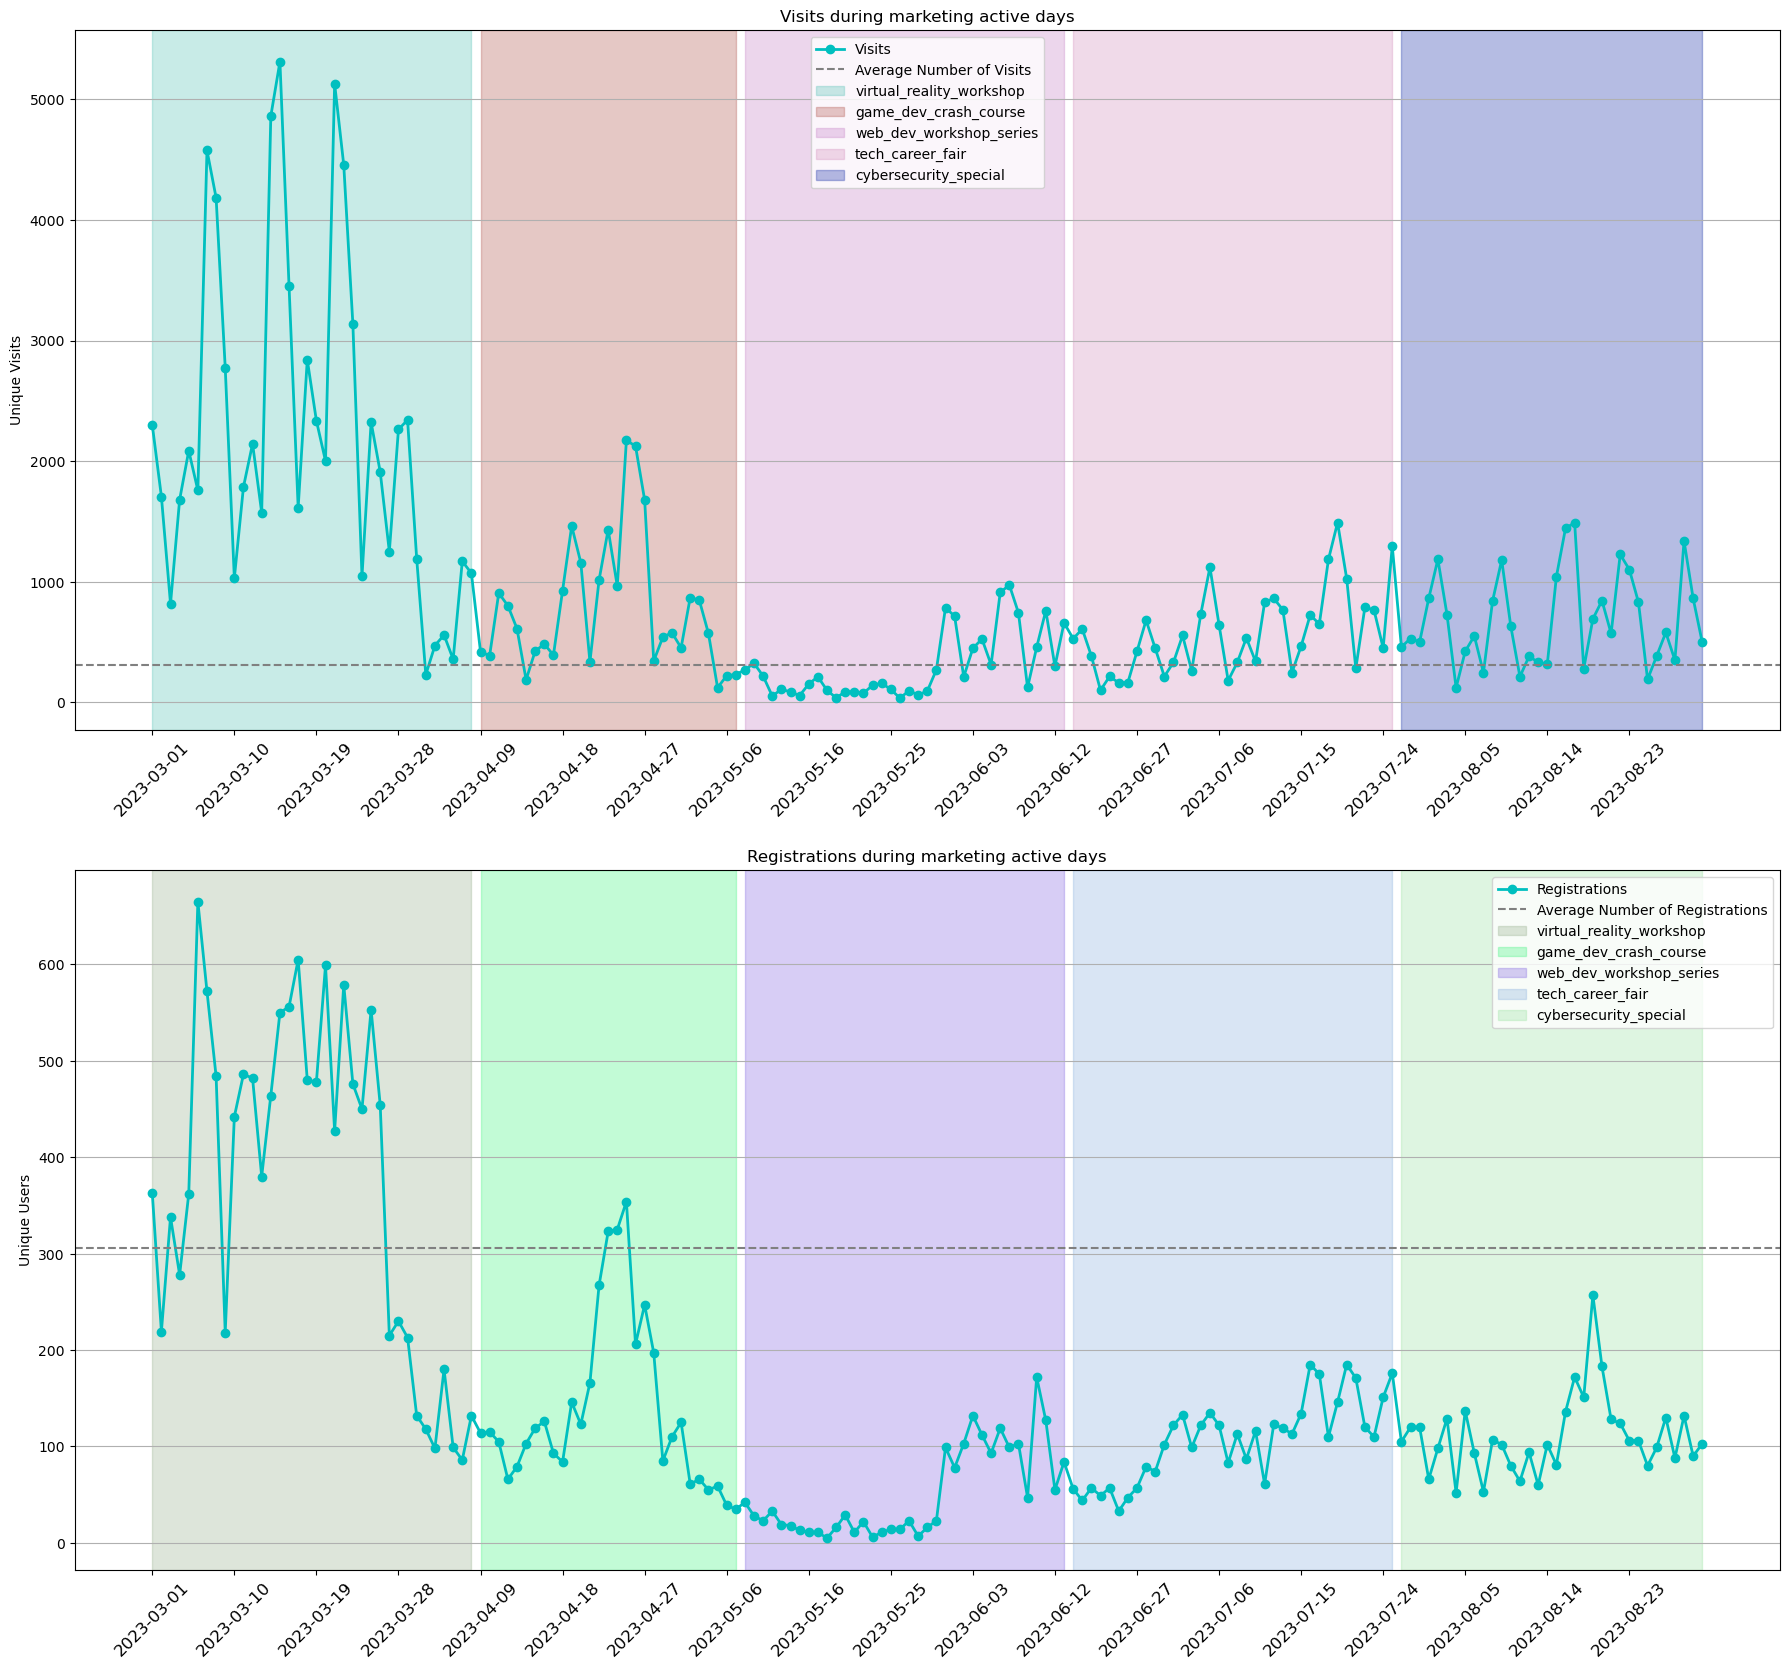

In [59]:
# отбор периодов рекламных кампаний:
campaign_days = cnv_ads[['date_group', 'utm_campaign']]
virtual_reality_workshop = campaign_days.loc[campaign_days['utm_campaign'] == 'virtual_reality_workshop']
start_date = virtual_reality_workshop['date_group'].min()
end_date = virtual_reality_workshop['date_group'].max()

game_dev_crash_course = campaign_days.loc[campaign_days['utm_campaign'] == 'game_dev_crash_course']
start_date = game_dev_crash_course['date_group'].min()
end_date = game_dev_crash_course['date_group'].max()

web_dev_workshop_series = campaign_days.loc[campaign_days['utm_campaign'] == 'web_dev_workshop_series']
start_date = web_dev_workshop_series['date_group'].min()
end_date = web_dev_workshop_series['date_group'].max()

tech_career_fair = campaign_days.loc[campaign_days['utm_campaign'] == 'tech_career_fair']
start_date = tech_career_fair['date_group'].min()
end_date = tech_career_fair['date_group'].max()

cybersecurity_special = campaign_days.loc[campaign_days['utm_campaign'] == 'cybersecurity_special']
start_date = cybersecurity_special['date_group'].min()
end_date = cybersecurity_special['date_group'].max()    

# создание датафрейма с периодами проведения рекламных кампаний:
periods_of_ads = pd.DataFrame(columns=['start_date', 'end_date', 'utm_campaign'])
periods_of_ads['start_date'] = [virtual_reality_workshop['date_group'].min(), game_dev_crash_course['date_group'].min(), web_dev_workshop_series['date_group'].min(), tech_career_fair['date_group'].min(), cybersecurity_special['date_group'].min()]
periods_of_ads['end_date'] = [virtual_reality_workshop['date_group'].max(), game_dev_crash_course['date_group'].max(), web_dev_workshop_series['date_group'].max(), tech_career_fair['date_group'].max(), cybersecurity_special['date_group'].max()]
periods_of_ads['utm_campaign'] = ['virtual_reality_workshop', 'game_dev_crash_course', 'web_dev_workshop_series', 'tech_career_fair', 'cybersecurity_special']


def vis_regist_campaign_chart(cnv_ads):
    fig, axes = plt.subplots(2, 1, figsize=(22,20))
    visits_campaign = cnv_ads.groupby(['date_group'])['visits'].sum().reset_index()
    x = visits_campaign['date_group']
    y = visits_campaign['visits']
    axes[0].plot(x, y,
            marker="o",
            c="c",
            label='Visits',
            linewidth=2,
            markersize=6)
    avg_visits = cnv_ads['visits'].mean()
    axes[0].axhline(y=avg_visits, color='gray', linestyle='dashed', label='Average Number of Visits')
    ads_started = periods_of_ads['start_date'].to_list()
    ads_ended = periods_of_ads['end_date'].to_list()
    for i in range(len(ads_started)):
        axes[0].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[0].set_title('Visits during marketing active days')
    axes[0].set_ylabel('Unique Visits')
    axes[0].set_xticks(visits_campaign['date_group'][::9])
    axes[0].set_xticklabels(visits_campaign['date_group'][::9], fontsize=12, rotation=45)
    axes[0].legend()
    axes[0].grid(axis='y')
    registr_campaign = cnv_ads.groupby(['date_group'])['registrations'].sum().reset_index()
    x3 = registr_campaign['date_group']
    y3 = registr_campaign['registrations']
    axes[1].plot(x3, y3,
            marker="o",
            c="c",
            label='Registrations',
            linewidth=2,
            markersize=6)
    avg_registrations = cnv_ads['registrations'].mean()
    axes[1].axhline(y=avg_visits, color='gray', linestyle='dashed', label='Average Number of Registrations')
    for i in range(len(ads_started)):
        axes[1].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[1].set_title('Registrations during marketing active days')
    axes[1].set_ylabel('Unique Users')
    axes[1].set_xticks(registr_campaign['date_group'][::9])
    axes[1].set_xticklabels(registr_campaign['date_group'][::9], fontsize=12, rotation=45)
    axes[1].legend()
    axes[1].grid(axis='y')
    plt.savefig('./charts/Visits_and_registrations_chart.png')
vis_regist_campaign_chart(cnv_ads)

In [60]:
avg_visits = cnv_ads['visits'].mean()
print(avg_visits)

306.23781676413256


In [61]:
avg_registrations = cnv_ads['registrations'].mean()
print(avg_visits)

306.23781676413256


### Дополнительные графики для презентации

Cтолбчатый график итоговых визитов за каждый месяц:

In [62]:
total_visits_chart = upd_cnv_ads
total_visits_chart['date_group'] = total_visits_chart['date_group'].astype('datetime64[ns]')
# total_visits_chart['week_day'] = pd.DatetimeIndex(total_visits_chart['date_group']).weekday
total_visits_chart['month'] = pd.DatetimeIndex(total_visits_chart['date_group']).month
# total_visits_chart['year'] = pd.DatetimeIndex(total_visits_chart['date_group']).year
total_visits_chart = total_visits_chart.groupby(['month'])['visits'].sum().reset_index()
total_visits_chart.head()

,month,visits
0,3,76103
1,4,22964
2,5,6921
3,6,11056
4,7,18337


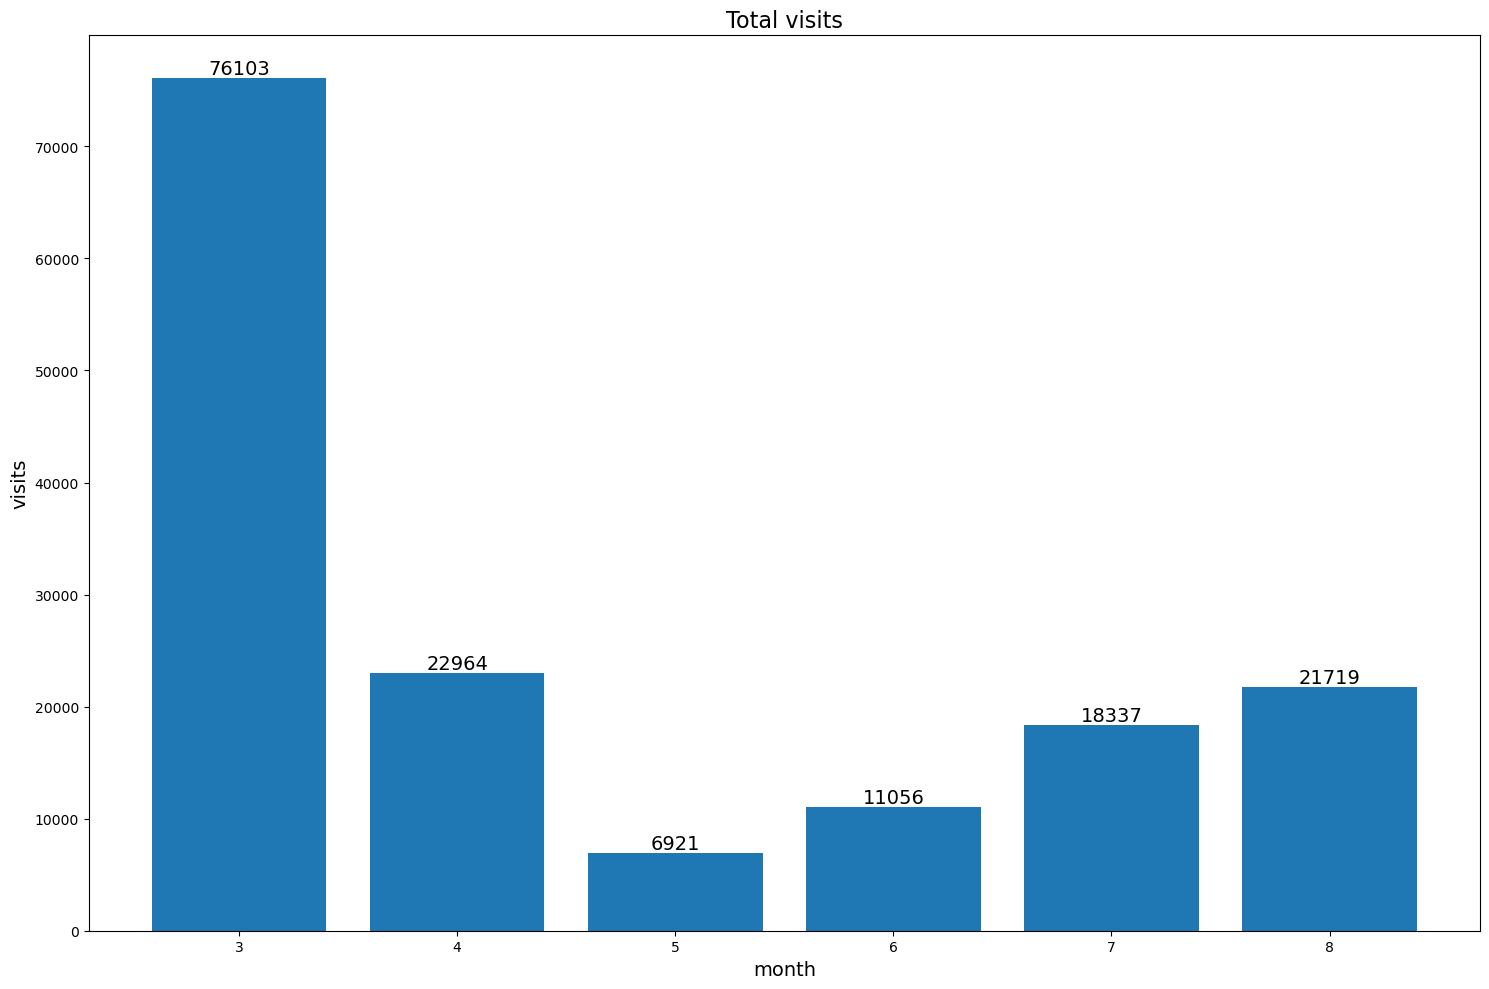

In [63]:
def total_visits_by_month_chart(total_visits_chart):
    fig, ax = plt.subplots(figsize=(15,10))
    bars = plt.bar(x='month', height='visits', data=total_visits_chart)
    ax.bar_label(bars, fontsize=14)
    plt.title('Total visits', fontsize=16)
    plt.xlabel('month', fontsize=14)
    plt.ylabel('visits', fontsize=14)
    # plt.xticks(rotation=45)
    # plt.grid()
    plt.tight_layout()
    plt.savefig('./charts_for_presentation/Total_visits_by_month_chart.png')
total_visits_by_month_chart(total_visits_chart)

Cтолбчатый график итоговых регистраций за каждый месяц:

In [64]:
total_registrations_chart = upd_cnv_ads
total_registrations_chart['date_group'] = total_registrations_chart['date_group'].astype('datetime64[ns]')
# total_visits_chart['date_group'] = pd.to_datetime(total_visits_chart['date_group'], format='%Y-%m-%dT%H:%M:%S')
# total_visits_chart['week_day'] = pd.DatetimeIndex(total_visits_chart['date_group']).weekday
total_registrations_chart['month'] = pd.DatetimeIndex(total_registrations_chart['date_group']).month
# total_visits_chart['year'] = pd.DatetimeIndex(total_visits_chart['date_group']).year
total_registrations_chart = total_registrations_chart.groupby(['month'])['registrations'].sum().reset_index()
total_registrations_chart.head(6)

,month,registrations
0,3,12868
1,4,4148
2,5,934
3,6,1979
4,7,3556
5,8,3403


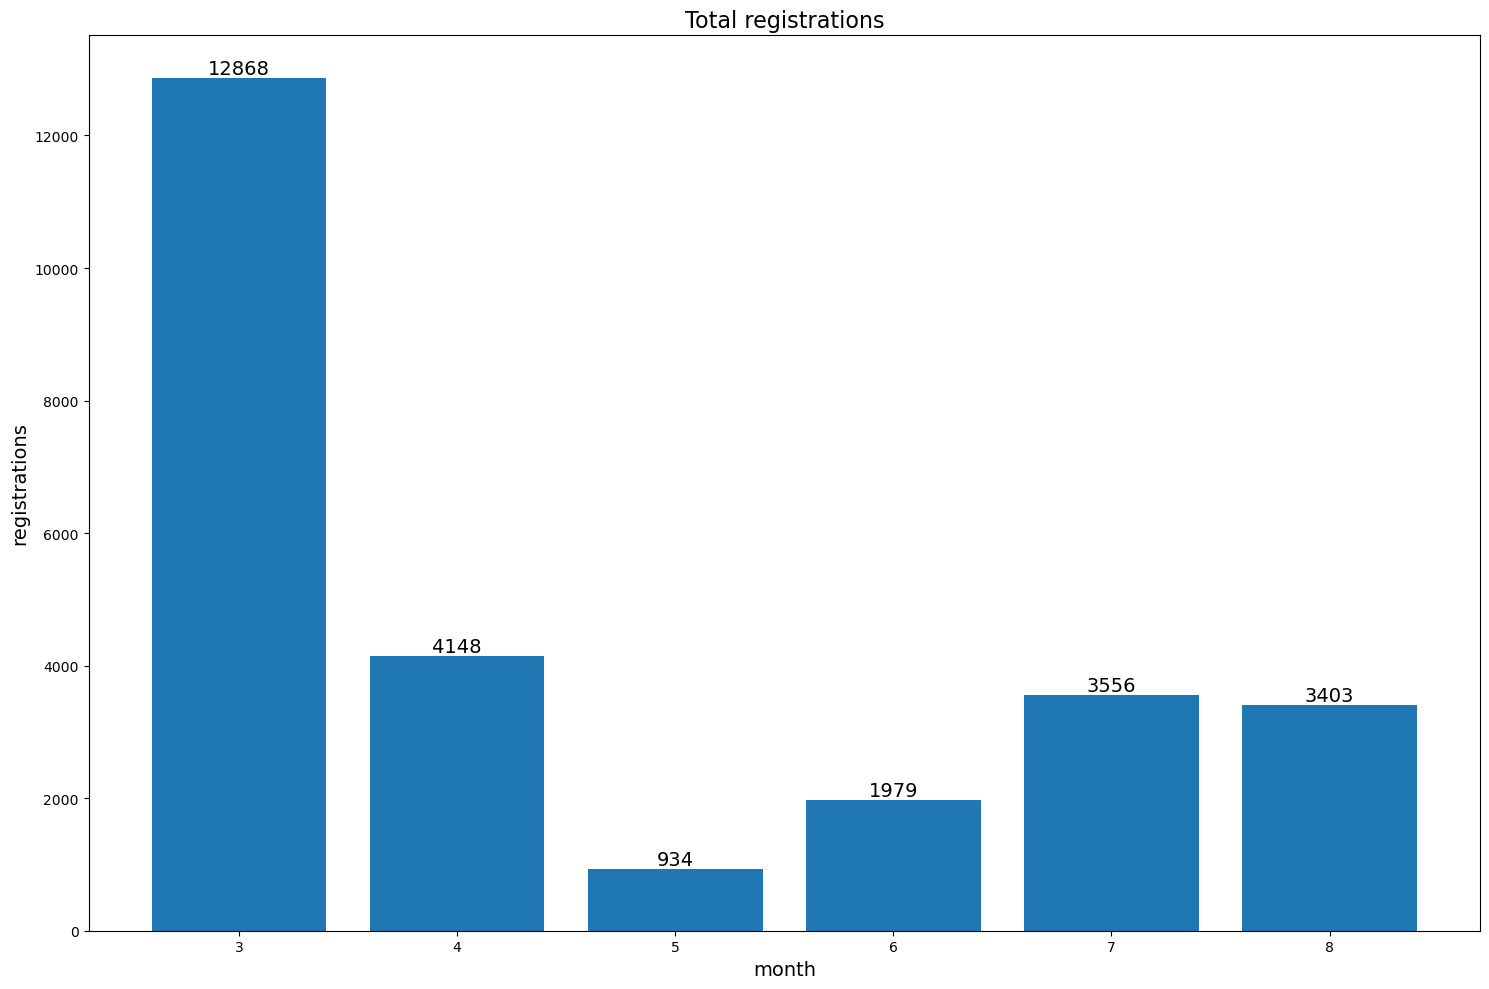

In [65]:
def total_registrations_by_month_chart(total_registrations_chart):
    fig, ax = plt.subplots(figsize=(15,10))
    bars = plt.bar(x='month', height='registrations', data=total_registrations_chart)
    ax.bar_label(bars, fontsize=14)
    plt.title('Total registrations', fontsize=16)
    plt.xlabel('month', fontsize=14)
    plt.ylabel('registrations', fontsize=14)
    # plt.xticks(rotation=45)
    # plt.grid()
    plt.tight_layout()
    plt.savefig('./charts_for_presentation/Total_registrations_by_month_chart.png')
total_registrations_by_month_chart(total_registrations_chart)

In [68]:
total_costs = cnv_ads['cost'].sum()
print(total_costs) # общие расходы на рекламу по таблице конверсии, соединенной с расходами на рекламу

99357


In [70]:
total_costs2 = upd_cnv_ads['cost'].sum()
print(total_costs2) # общие расходы на рекламу по таблице с полями "date_group, visits, registrations, cost, utm_campaign"

99357


In [101]:
total_costs_by_campaign = upd_cnv_ads
total_costs_by_campaign['date_group'] = total_costs_by_campaign['date_group'].astype('datetime64[ns]')
# total_costs_by_campaign['date_group'] = pd.to_datetime(total_costs_by_campaign['date_group'], format='%Y-%m-%dT%H:%M:%S')
# total_costs_by_campaign['week_day'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).weekday
total_costs_by_campaign['month'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).month
# total_costs_by_campaign['year'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).year

# расходы в месяц по каждой utm_campaign:
total_costs_by_campaign_per_month = total_costs_by_campaign.groupby(['month', 'utm_campaign'])[['cost', 'visits', 'registrations']].sum().reset_index()
# ежемесячные расходы на рекламу:
total_costs_per_month = total_costs_by_campaign.groupby(['month'])[['cost', 'visits', 'registrations']].sum().reset_index()
# расходы по каждой utm_campaign за исследуемый период:
total_costs_by_utm_campaign = total_costs_by_campaign.groupby(['utm_campaign'])[['cost', 'visits', 'registrations']].sum().reset_index()

In [102]:
total_costs_by_campaign_per_month['conversion'] = (total_costs_by_campaign_per_month['registrations'] / total_costs_by_campaign_per_month['visits'] * 100).round(2)
total_costs_by_campaign_per_month.head(100) # расходы в месяц по каждой utm_campaign

,month,utm_campaign,cost,visits,registrations,conversion
0,3,virtual_reality_workshop,16866,76103,12868,16.91
1,4,game_dev_crash_course,12510,19338,3553,18.37
2,4,virtual_reality_workshop,2889,3626,595,16.41
3,5,game_dev_crash_course,4650,3310,440,13.29
4,5,web_dev_workshop_series,14433,3611,494,13.68
5,6,tech_career_fair,6603,3923,655,16.70
6,6,web_dev_workshop_series,7221,7133,1324,18.56
7,7,cybersecurity_special,1818,1488,345,23.19
8,7,tech_career_fair,14316,16849,3211,19.06
9,8,cybersecurity_special,18051,21719,3403,15.67


In [98]:
total_costs_per_month.head(100) # ежемесячные расходы на рекламу

,month,cost,visits,registrations
0,3,16866,76103,12868
1,4,15399,22964,4148
2,5,19083,6921,934
3,6,13824,11056,1979
4,7,16134,18337,3556
5,8,18051,21719,3403


In [99]:
total_costs_by_utm_campaign.head(100) # расходы по каждой utm_campaign за исследуемый период

,utm_campaign,cost,visits,registrations
0,cybersecurity_special,19869,23207,3748
1,game_dev_crash_course,17160,22648,3993
2,tech_career_fair,20919,20772,3866
3,virtual_reality_workshop,19755,79729,13463
4,web_dev_workshop_series,21654,10744,1818


Круговая диаграмма за МАЙ 2023 по типам регистрации (4 типа):

In [121]:
registrations_by_types = upd_regs1
registrations_by_types['date_group'] = upd_regs1['date_group'].astype('datetime64[ns]')
registrations_by_types['month'] = pd.DatetimeIndex(registrations_by_types['date_group']).month
registrations_by_types_per_month = registrations_by_types.groupby(['month', 'registration_type'])['registrations'].sum().reset_index()

In [114]:
# для слайда Total Registrations by Registration Type (Stacked)
pvt_registration_types = registrations_by_types_per_month.pivot_table(index='month', columns='registration_type', values='registrations').reset_index()
pvt_registration_types.head(100)

registration_type,month,apple,email,google,yandex
0,3,2323.0,5404.0,4216.0,925.0
1,4,821.0,1855.0,1381.0,358.0
2,5,179.0,414.0,297.0,82.0
3,6,446.0,1045.0,796.0,174.0
4,7,669.0,1795.0,1324.0,290.0
5,8,650.0,1464.0,1032.0,257.0


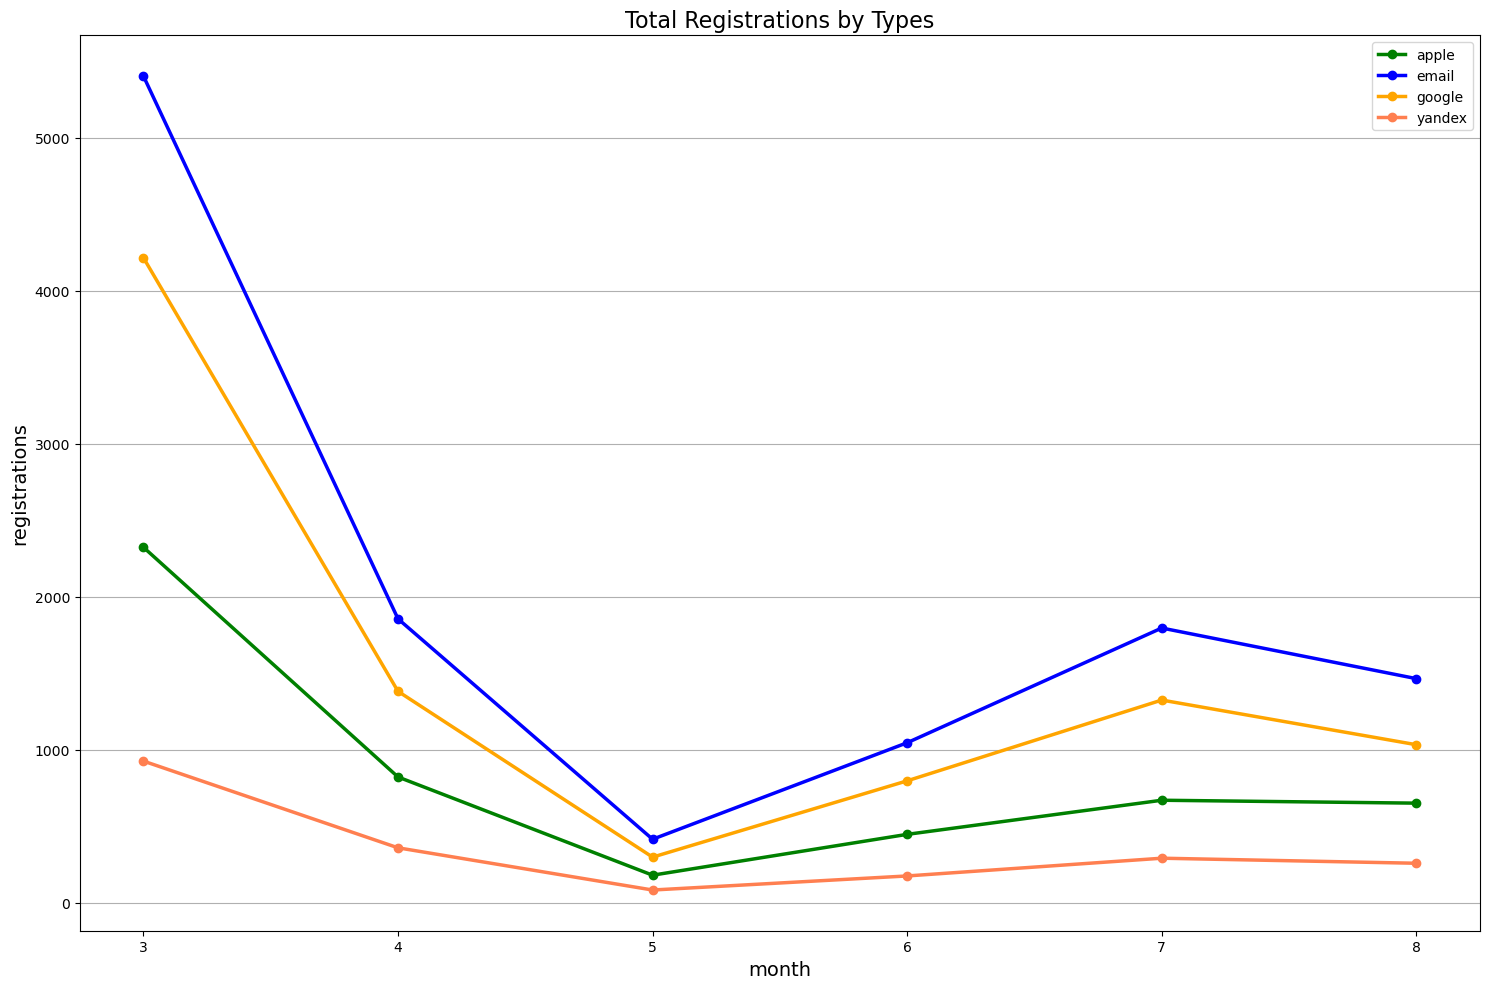

In [120]:
def registrations_by_types(pvt_registration_types):
    fig, ax = plt.subplots(figsize=(15,10))
    x = pvt_registration_types['month']
    y1 = pvt_registration_types['apple']
    y2 = pvt_registration_types['email']
    y3 = pvt_registration_types['google']
    y4 = pvt_registration_types['yandex']
    ax.plot(x, y1, color='green', marker="o", linewidth=2.5, markersize=6, label='apple')
    ax.plot(x, y2, color='blue', marker="o", linewidth=2.5, markersize=6, label='email')
    ax.plot(x, y3, color='orange', marker="o", linewidth=2.5, markersize=6, label='google')
    ax.plot(x, y4, color='coral', marker="o", linewidth=2.5, markersize=6, label='yandex')
    plt.title('Total Registrations by Types', fontsize=16)
    plt.legend()
    plt.xlabel('month', fontsize=14)
    plt.ylabel('registrations', fontsize=14)
    # plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts_for_presentation/Total_registrations_by_month_types_chart.png')
registrations_by_types(pvt_registration_types)

In [125]:
# для 12-го слайда с графиком Visits by Platform (Stacked)
total_visits_by_platform = cnv_ads
total_visits_by_platform['date_group'] = total_visits_by_platform['date_group'].astype('datetime64[ns]')
total_visits_by_platform['month'] = pd.DatetimeIndex(total_visits_by_platform['date_group']).month
total_visits_by_platform_per_month = total_visits_by_platform.groupby(['month', 'platform'])['visits'].sum().reset_index()
pvt_total_visits_by_platform = total_visits_by_platform_per_month.pivot_table(index='month', columns='platform', values='visits').reset_index()
pvt_total_visits_by_platform.head(100)

platform,month,android,ios,web
0,3,8155.0,3367.0,64581.0
1,4,2235.0,952.0,19777.0
2,5,532.0,201.0,6188.0
3,6,1236.0,469.0,9351.0
4,7,2189.0,826.0,15322.0
5,8,1857.0,938.0,18924.0


In [128]:
# для слайда Total Registrations by Platform (Stacked)
total_registrations_by_platform = cnv_ads
total_registrations_by_platform['date_group'] = total_registrations_by_platform['date_group'].astype('datetime64[ns]')
total_registrations_by_platform['month'] = pd.DatetimeIndex(total_registrations_by_platform['date_group']).month
total_registrations_by_platform_per_month = total_registrations_by_platform.groupby(['month', 'platform'])['registrations'].sum().reset_index()
pvt_total_registrations_by_platform = total_registrations_by_platform_per_month.pivot_table(index='month', columns='platform', values='registrations').reset_index()
pvt_total_registrations_by_platform.head(100)

platform,month,android,ios,web
0,3,6376.0,2703.0,3789.0
1,4,2003.0,803.0,1342.0
2,5,413.0,158.0,363.0
3,6,1012.0,395.0,572.0
4,7,1822.0,700.0,1034.0
5,8,1542.0,793.0,1068.0
